Read the experiment results/logs

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.use('Agg')       # Use non-interactive backend for matplotlib to save memory

from utils import print_log

Experiment folder

In [2]:
expt_datetime = datetime(2025, 7, 27, 1, 8, 53)
result_phrase = "train"  # or "test" or "validate"

expt_folder = Path("experiments") / expt_datetime.strftime("%Y%m%d_%H%M%S") / ("logs_" + result_phrase)

if not expt_folder.exists():
    print_log(f"Experiment folder {expt_folder} does not exist. Please check the path.")

Before hand, we read the env config json and display information

In [3]:
env_config_path = expt_folder.parent / "env_config.json"
if not env_config_path.exists():
    print_log(f"Environment config file {env_config_path} does not exist. Please check the path.")

# Load environment configuration
with open(env_config_path, 'r') as f:
    env_config = json.load(f)

# Display environment configuration
print_log("Environment Configuration:")
for key, value in env_config.items():
    print_log(f"{key}: {value}")

[2025-07-27 14:37:01:757] Environment Configuration:
[2025-07-27 14:37:01:757] battery: {'capacity': 8.0, 'max_charging_rate': 4.0, 'max_discharging_rate': 4.0, 'efficiency': 1.0, 'initial_soc': 0.15}
[2025-07-27 14:37:01:757] reward_lambda: 0.5
[2025-07-27 14:37:01:757] h_network_type: HNetworkType.H_NETWORK
[2025-07-27 14:37:01:757] init_soc: 0.15
[2025-07-27 14:37:01:757] data_loader_type: SimpleSmartMeterDataLoader
[2025-07-27 14:37:01:757] curriculum_info: {'curriculum_enabled': False, 'max_episode_days': 1, 'episodes_by_length': {'1': 162}, 'total_episodes': 162, 'registry_path': 'experiments/20250727_010853/simple_episode_registry_train.json', 'data_loader_type': 'simple'}
[2025-07-27 14:37:01:757] training_timestep: 3


In [4]:
max_battery_capacity = env_config.get("battery").get("capacity", 8)
# max_battery_capacity = 8

First, we read the progress.json of the selected phrase

In [5]:
from stable_baselines3.common.logger import read_json

# Read the logged .json file and open it as a Dataframe
log_file_path = expt_folder / "progress.json"
if log_file_path.exists():
    log_data = read_json(log_file_path)

log_data

2025-07-27 14:37:02.708309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-27 14:37:02.716138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753623422.724634 1062307 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753623422.727157 1062307 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753623422.734046 1062307 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

time/iterations  rollout/ep_rew_mean  rollout/ep_len_mean  time/fps  \
0                  1            57.011560              1439.00       178   
1                  2            63.050762              1439.00       157   
2                  3            63.989771              1439.00       151   
3                  4            78.370176              1439.00       148   
4                  5            74.979912              1439.00       147   
..               ...                  ...                  ...       ...   
417              418           110.070215              1439.00        63   
418              419           110.181772              1439.00        60   
419              420           109.800065              1439.00        61   
420              421           109.632523              1439.00        61   
421              422           109.523307              1429.18        61   

     time/time_elapsed  time/total_timesteps  train/learning_rate  \
0                   11                  2048                  NaN   
1                   26                  4096               0.0003   
2                   40                  6144               0.0003   
3                   55                  8192               0.0003   
4                   69                 10240               0.0003   
..                 ...                   ...                  ...   
417              13560                856064               0.0003   
418              14069                858112               0.0003   
419              14083                860160               0.0003   
420              14096                862208               0.0003   
421              14108                864256               0.0003   

     train/entropy_loss  train/policy_gradient_loss  train/value_loss  \
0                   NaN                         NaN               NaN   
1             -1.410083                   -0.004600          0.150470   
2             -1.403428                   -0.000251          0.122795   
3             -1.397371                   -0.003638          0.246624   
4             -1.377303                   -0.002092          0.325230   
..                  ...                         ...               ...   
417            1.733362                   -0.001619          0.117446   
418            1.735361                    0.000377          0.184021   
419            1.741067                    0.003222          0.173321   
420            1.748505                   -0.000602          0.100174   
421            1.763939                    0.002955          0.135781   

     train/approx_kl  train/clip_fraction  train/loss  \
0                NaN                  NaN         NaN   
1           0.004600             0.033691    0.052858   
2           0.002875             0.008740    0.055198   
3           0.004692             0.031006    0.041568   
4           0.004043             0.023486    0.104927   
..               ...                  ...         ...   
417         0.010539             0.100732    0.045455   
418         0.009456             0.110693    0.068334   
419         0.009593             0.104395    0.101979   
420         0.007312             0.111426    0.060458   
421         0.006802             0.095557    0.044211   

     train/explained_variance  train/std  train/n_updates  train/clip_range  
0                         NaN        NaN              NaN               NaN  
1                   -0.356226   0.980383             10.0               0.2  
2                    0.175031   0.988009             20.0               0.2  
3                    0.498413   0.966876             30.0               0.2  
4                    0.572871   0.953548             40.0               0.2  
..                        ...        ...              ...               ...  
417                  0.988589   0.042776           4170.0               0.2  
418                  0.962750   0.042455           4180.0               0.2  

We then read the `h_network_<result_phrase>_loss_list.json`, and load it to a dataframe as well

`h_network_<result_phrase>_loss_list.json` is a json list

In [6]:
import json

h_network_loss_list_path = expt_folder / f"h_network_{result_phrase}_loss_list.json"
if h_network_loss_list_path.exists():
    with open(h_network_loss_list_path, "r") as f:
        h_network_loss_list = json.load(f)

    # Convert the list to a DataFrame
    h_network_loss_df = pd.DataFrame(h_network_loss_list)

In [7]:
h_network_loss_df

mean_loss  std_loss  num_batches
0     0.532556  0.046718            2
1     0.527398  0.012887            2
2     0.494941  0.016262            2
3     0.425450  0.053010            2
4     0.455040  0.011857            2
..         ...       ...          ...
116   0.008745  0.000984            2
117   0.015551  0.001422            2
118   0.011090  0.001917            2
119   0.008804  0.000191            2
120   0.006249  0.002316            2

[121 rows x 3 columns]

We also read the reward of each episode from the agent interacting with the env

In [8]:
episodes_rewards_path = expt_folder / f"episodes_rewards.json"
if episodes_rewards_path.exists():
    with open(episodes_rewards_path, "r") as f:
        episodes_rewards = json.load(f)

    # Convert the list to a DataFrame
    episodes_rewards_df = pd.DataFrame(episodes_rewards)

episodes_rewards_df

sum      mean       std
0     57.011560  0.039619  0.028707
1     69.089964  0.048012  0.040296
2     67.250737  0.046734  0.036446
3     62.606822  0.043507  0.041158
4    135.891795  0.094435  0.066816
..          ...       ...       ...
600   95.213194  0.066166  0.060596
601  109.798021  0.076302  0.062474
602  106.790255  0.074211  0.058730
603  177.888226  0.123619  0.049142
604   58.873353  0.128826  0.048970

[605 rows x 3 columns]

We also load the information of each episode into a list of dataframes

In [9]:
from collections.abc import MutableMapping

def flatten(dictionary, parent_key='', separator='_'):
    items = []
    for key, value in dictionary.items():
        new_key = parent_key + separator + key if parent_key else key
        if isinstance(value, MutableMapping):
            items.extend(flatten(value, new_key, separator=separator).items())
        else:
            items.append((new_key, value))
    return dict(items)

In [10]:
episode_info_folder = expt_folder / "episode_info"
if episode_info_folder.exists():
    episode_info_files = sorted(list(episode_info_folder.glob("*.json")))
    episode_info_dfs = []
    episode_metadata_list = []  # Store metadata for each episode

    for file in episode_info_files:
        with open(file, "r") as f:
            episode_info = json.load(f)
            
            # Extract episode data and metadata
            if isinstance(episode_info, dict) and 'episode_data' in episode_info:
                # New format with metadata
                episode_data = episode_info['episode_data']
                metadata = episode_info.get('metadata', {})
                df = pd.DataFrame(episode_data)

                metadata = flatten(metadata)  # Flatten metadata dictionary
                
                # Store metadata for analysis
                episode_metadata_list.append({
                    'episode_file': file.name,
                    'episode_idx': int(file.stem.split('_')[1]),
                    **metadata
                })
            else:
                # Legacy format - just episode data
                df = pd.DataFrame(episode_info)
                episode_metadata_list.append({
                    'episode_file': file.name,
                    'episode_idx': int(file.stem.split('_')[1]),
                    'episode_content_id': None,
                    'episode_length_days': 1,  # Default to 1 day for legacy
                    'curriculum_phase': None,
                    'data_loader_type': 'Unknown'
                })
            
            # add a column for the episode number
            df['episode'] = int(file.stem.split('_')[1])  # Assuming the file name is like "episode_0_info.json", "episode_1_info.json", etc.
            # convert the datetime strings to datetime objects using python isoformat
            df['datetime'] = pd.to_datetime(df['datetime'], format='ISO8601')

            # temporary fix
            # we shift "grid_load (W)", "action (kW)", "battery_action (kW)", "reward", "f_signal", "g_signal" columns to the a timestep forward, then drop the last row for each episode
            df['grid_load (W)'] = df['grid_load (W)'].shift(-1)
            df['action (kW)'] = df['action (kW)'].shift(-1)
            df['battery_action (kW)'] = df['battery_action (kW)'].shift(-1)
            df['reward'] = df['reward'].shift(-1)
            df['f_signal'] = df['f_signal'].shift(-1)
            df['g_signal'] = df['g_signal'].shift(-1)
            df['f_signal-predicted_mean'] = df['f_signal-predicted_mean'].shift(-1)
            df['f_signal-predicted_log_var'] = df['f_signal-predicted_log_var'].shift(-1)
            df['f_signal-target'] = df['f_signal-target'].shift(-1)


            # remove the last row for each episode
            df = df[:-1]

            episode_info_dfs.append(df)

            print_log(f"Loaded episode info from {file.name}")

    # Concatenate all DataFrames into one
    episode_info_df = pd.concat(episode_info_dfs, ignore_index=True)
    
    # Create episode metadata DataFrame for analysis
    episode_metadata_df = pd.DataFrame(episode_metadata_list)
    
    print_log(f"Loaded {len(episode_info_dfs)} episodes with metadata")
    print_log(f"Data loader types found: {episode_metadata_df['curriculum_info_data_loader_type'].value_counts().to_dict()}")
    if 'episode_length_days' in episode_metadata_df.columns:
        print_log(f"Episode lengths found: {episode_metadata_df['episode_length_days'].value_counts().sort_index().to_dict()}")
    # if 'curriculum_phase' in episode_metadata_df.columns and episode_metadata_df['curriculum_phase'].notna().any():
    #     print_log(f"Curriculum phases found: {episode_metadata_df['curriculum_phase'].value_counts().to_dict()}")
    

[2025-07-27 14:37:03:678] Loaded episode info from episode_0001_info.json
[2025-07-27 14:37:03:686] Loaded episode info from episode_0002_info.json
[2025-07-27 14:37:03:693] Loaded episode info from episode_0003_info.json
[2025-07-27 14:37:03:700] Loaded episode info from episode_0004_info.json
[2025-07-27 14:37:03:707] Loaded episode info from episode_0005_info.json
[2025-07-27 14:37:03:713] Loaded episode info from episode_0006_info.json
[2025-07-27 14:37:03:720] Loaded episode info from episode_0007_info.json
[2025-07-27 14:37:03:727] Loaded episode info from episode_0008_info.json
[2025-07-27 14:37:03:733] Loaded episode info from episode_0009_info.json
[2025-07-27 14:37:03:863] Loaded episode info from episode_0010_info.json
[2025-07-27 14:37:03:869] Loaded episode info from episode_0011_info.json
[2025-07-27 14:37:03:875] Loaded episode info from episode_0012_info.json
[2025-07-27 14:37:03:882] Loaded episode info from episode_0013_info.json
[2025-07-27 14:37:03:889] Loaded episo

In [11]:
episode_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   episode_file                          605 non-null    object
 1   episode_idx                           605 non-null    int64 
 2   episode_training_idx                  605 non-null    int64 
 3   episode_data_idx                      605 non-null    int64 
 4   episode_content_id                    605 non-null    object
 5   episode_length_days                   605 non-null    int64 
 6   training_timestep                     605 non-null    int64 
 7   dataset_type                          605 non-null    object
 8   curriculum_info_curriculum_enabled    605 non-null    bool  
 9   curriculum_info_max_episode_days      605 non-null    int64 
 10  curriculum_info_episodes_by_length_1  605 non-null    int64 
 11  curriculum_info_total_episodes  

In [12]:
episode_info_df

episode_index  current_step            datetime  battery_soc (%)  \
0                  96             0 2013-08-28 00:00:02         0.150000   
1                  96             1 2013-08-28 00:01:02         0.149367   
2                  96             2 2013-08-28 00:02:02         0.148738   
3                  96             3 2013-08-28 00:03:02         0.148108   
4                  96             4 2013-08-28 00:04:02         0.147466   
...               ...           ...                 ...              ...   
862927              7           452 2013-03-10 07:32:04         0.838994   
862928              7           453 2013-03-10 07:33:04         0.840141   
862929              7           454 2013-03-10 07:34:04         0.841687   
862930              7           455 2013-03-10 07:35:04         0.842754   
862931              7           456 2013-03-10 07:36:04         0.844153   

        battery_soc (kWh)  user_load (W)  grid_load (W)  action (kW)  \
0                1.200000     304.000000   0.000000e+00    -2.414689   
1                1.194933     301.620664   5.684342e-14    -3.350458   
2                1.189906     302.718374   0.000000e+00    -1.130066   
3                1.184861     307.954288   0.000000e+00    -0.580247   
4                1.179728     300.548825   0.000000e+00    -3.653566   
...                   ...            ...            ...          ...   
862927           6.711950     166.931455   7.176420e+02     0.550710   
862928           6.721128     166.868224   9.090532e+02     0.742185   
862929           6.733498     167.341185   6.792234e+02     0.511882   
862930           6.742030     167.131458   8.385945e+02     0.671463   
862931           6.753221     166.528055   1.352261e+03     1.185733   

        battery_action (kW)    reward  f_signal  g_signal  \
0                 -0.304000  0.003754 -0.008504  0.000996   
1                 -0.301621  0.004064 -0.009120  0.000991   
2                 -0.302718  0.003403 -0.007799  0.000993   
3                 -0.307954  0.005139 -0.011282  0.001005   
4                 -0.300549  0.005060 -0.011108  0.000988   
...                     ...       ...       ...       ...   
862927             0.550710  0.180513 -0.364176  0.003151   
862928             0.742185  0.162626 -0.329385  0.004132   
862929             0.511882  0.182431 -0.367814  0.002952   
862930             0.671463  0.168863 -0.341496  0.003770   
862931             1.185733  0.109723 -0.225851  0.006406   

        f_signal-predicted_mean  f_signal-predicted_log_var  f_signal-target  \
0                      0.080784                         0.0        -0.050192   
1                      0.088751                         0.0        -0.046925   
2                      0.094043                         0.0        -0.031338   
3                      0.097690                         0.0        -0.053383   
4                      0.100191                         0.0        -0.049699   
...                         ...                         ...              ...   
862927                 0.911294                         0.0        -0.604667   
862928                 1.157225                         0.0        -0.601505   
862929                 0.798024                         0.0        -0.602907   
862930                 1.088301                         0.0        -0.606942   
862931                 1.555322                         0.0        -0.606418   

       TimeLimit.truncated  episode  
0                      NaN        1  
1                    False        1  
2                    False        1  
3                    False        1  
4                    False        1  
...                    ...      ...  
862927               False      605  
862928               False      605  
862929               False      605  
862930               False      605  
862931               False      605  

[862932 rows x 17 columns]

In [13]:
# Display episode metadata summary
print_log("Episode Metadata Summary:")
if 'episode_metadata_df' in locals():
    display(episode_metadata_df.head(10))
    
    # Group episodes by content ID to identify repeated episodes
    if 'episode_content_id' in episode_metadata_df.columns:
        content_id_groups = episode_metadata_df.groupby('episode_content_id').agg({
            'episode_idx': list,
            'episode_length_days': 'first',
            # 'curriculum_phase': 'first'
        }).reset_index()
        
        # Show episodes that appear multiple times (same content, different iterations)
        repeated_episodes = content_id_groups[content_id_groups['episode_idx'].apply(len) > 1]
        if len(repeated_episodes) > 0:
            print_log(f"Found {len(repeated_episodes)} episodes that were repeated across training:")
            display(repeated_episodes.head())
        else:
            print_log("No repeated episodes found (each episode content is unique)")
else:
    print_log("No episode metadata available - using legacy format")

[2025-07-27 14:37:07:944] Episode Metadata Summary:


episode_file  episode_idx  episode_training_idx  \
0  episode_0001_info.json            1                     1   
1  episode_0002_info.json            2                     2   
2  episode_0003_info.json            3                     3   
3  episode_0004_info.json            4                     4   
4  episode_0005_info.json            5                     5   
5  episode_0006_info.json            6                     6   
6  episode_0007_info.json            7                     7   
7  episode_0008_info.json            8                     8   
8  episode_0009_info.json            9                     9   
9  episode_0010_info.json           10                    10   

   episode_data_idx episode_content_id  episode_length_days  \
0                96       43ad0a675bbd                    1   
1                 8       ca0ec226fb2f                    1   
2               147       a5a8920fa5a9                    1   
3                35       a11dd7869663                    1   
4                41       778384faf893                    1   
5                29       4f8af477a245                    1   
6                54       a3ae068abccd                    1   
7                28       5a90f90f8776                    1   
8                56       a2f8e7cca897                    1   
9               131       a1c3f934e067                    1   

   training_timestep dataset_type  curriculum_info_curriculum_enabled  \
0               1442        train                               False   
1               2881        train                               False   
2               4320        train                               False   
3               5759        train                               False   
4               7198        train                               False   
5               8637        train                               False   
6              10076        train                               False   
7              11515        train                               False   
8              12954        train                               False   
9              14393        train                               False   

   curriculum_info_max_episode_days  curriculum_info_episodes_by_length_1  \
0                                 1                                   162   
1                                 1                                   162   
2                                 1                                   162   
3                                 1                                   162   
4                                 1                                   162   
5                                 1                                   162   
6                                 1                                   162   
7                                 1                                   162   
8                                 1                                   162   
9                                 1                                   162   

   curriculum_info_total_episodes  \
0                             162   
1                             162   
2                             162   
3                             162   
4                             162   
5                             162   
6                             162   
7                             162   
8                             162   
9                             162   

                       curriculum_info_registry_path  \
0  experiments/20250727_010853/simple_episode_reg...   
1  experiments/20250727_010853/simple_episode_reg...   
2  experiments/20250727_010853/simple_episode_reg...   
3  experiments/20250727_010853/simple_episode_reg...   
4  experiments/20250727_010853/simple_episode_reg...   
5  experiments/20250727_010853/simple_episode_reg...   
6  experiments/20250727_010853/simple_episode_reg...   
7  experiments/20250727_010853/simple_episode_reg...   
8  experiments/20250727_010853/simple_episode_reg.

[2025-07-27 14:37:07:956] Found 146 episodes that were repeated across training:


episode_content_id              episode_idx  episode_length_days
0       000bcf1ac6b2   [22, 23, 41, 224, 366]                    1
1       0084b502e077               [267, 431]                    1
2       04154a5369e1  [26, 37, 390, 454, 515]                    1
3       05dc637e5b2f            [25, 39, 367]                    1
4       065f674584d9               [308, 342]                    1

In [14]:
episode_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862932 entries, 0 to 862931
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   episode_index               862932 non-null  int64         
 1   current_step                862932 non-null  int64         
 2   datetime                    862932 non-null  datetime64[ns]
 3   battery_soc (%)             862932 non-null  float64       
 4   battery_soc (kWh)           862932 non-null  float64       
 5   user_load (W)               862932 non-null  float64       
 6   grid_load (W)               862932 non-null  float64       
 7   action (kW)                 862932 non-null  float64       
 8   battery_action (kW)         862932 non-null  float64       
 9   reward                      862932 non-null  float64       
 10  f_signal                    862932 non-null  float64       
 11  g_signal                    862932 non-

In [15]:
# create episodes_rewards_df from episode_info_df
# compute the total reward, mean, and std for each episode
episodes_rewards_df = episode_info_df.groupby('episode').agg({
    'reward': ['sum', 'mean', 'std'],
}).reset_index()
episodes_rewards_df.columns = ['episode', 'sum', 'mean', 'std']

episodes_rewards_df

episode         sum      mean       std
0          1   57.011560  0.039619  0.028717
1          2   69.089964  0.048012  0.040310
2          3   67.250737  0.046734  0.036459
3          4   62.606822  0.043507  0.041172
4          5  135.891795  0.094435  0.066840
..       ...         ...       ...       ...
600      601   95.213194  0.066166  0.060617
601      602  109.798021  0.076302  0.062496
602      603  106.790255  0.074211  0.058751
603      604  177.888226  0.123619  0.049159
604      605   58.873353  0.128826  0.049024

[605 rows x 4 columns]

---

In [6]:
# attempt to read the episodes_df from logs_train as well
# those are .pkl dataframes

episodes_df_folder_path = expt_folder / "episodes_df"
if not episodes_df_folder_path.exists():
    print_log(f"Episodes DataFrame folder {episodes_df_folder_path} does not exist. Please check the path.")

episodes_df_files = sorted(list(episodes_df_folder_path.glob("*.pkl")))
episodes_df_list = []
for file in episodes_df_files:
    df = pd.read_pickle(file)
    episodes_df_list.append(df)

    print(f"Loaded episodes DataFrame from {file.name}")


Loaded episodes DataFrame from episode_0001.pkl
Loaded episodes DataFrame from episode_0002.pkl
Loaded episodes DataFrame from episode_0003.pkl
Loaded episodes DataFrame from episode_0004.pkl
Loaded episodes DataFrame from episode_0005.pkl
Loaded episodes DataFrame from episode_0006.pkl
Loaded episodes DataFrame from episode_0007.pkl
Loaded episodes DataFrame from episode_0008.pkl
Loaded episodes DataFrame from episode_0009.pkl
Loaded episodes DataFrame from episode_0010.pkl
Loaded episodes DataFrame from episode_0011.pkl
Loaded episodes DataFrame from episode_0012.pkl
Loaded episodes DataFrame from episode_0013.pkl
Loaded episodes DataFrame from episode_0014.pkl
Loaded episodes DataFrame from episode_0015.pkl
Loaded episodes DataFrame from episode_0016.pkl
Loaded episodes DataFrame from episode_0017.pkl
Loaded episodes DataFrame from episode_0018.pkl
Loaded episodes DataFrame from episode_0019.pkl
Loaded episodes DataFrame from episode_0020.pkl
Loaded episodes DataFrame from episode_0

In [7]:
episodes_df_list[0]

timestamp   aggregate            datetime    grid_load battery_soc  \
132191  1377648002  304.000000 2013-08-28 00:00:02   804.377238        0.15   
132192  1377648062  301.620664 2013-08-28 00:01:02  2423.906984    0.151042   
132193  1377648122  302.718374 2013-08-28 00:02:02  3753.618213    0.155464   
132194  1377648182  307.954288 2013-08-28 00:03:02  4307.954288    0.162653   
132195  1377648242  300.548825 2013-08-28 00:04:02  3280.452285    0.170987   
...            ...         ...                 ...          ...         ...   
133626  1377734102  212.814858 2013-08-28 23:55:02   425.652914    0.999557   
133627  1377734162  212.412497 2013-08-28 23:56:02   212.412497         1.0   
133628  1377734222  179.139330 2013-08-28 23:57:02          0.0         1.0   
133629  1377734282  155.433279 2013-08-28 23:58:02   334.572609    0.999627   
133630  1377734342  154.219873 2013-08-28 23:59:02         None        None   

        aggregate_std  
132191      -0.043110  
132192      -0.050192  
132193      -0.046925  
132194      -0.031338  
132195      -0.053383  
...               ...  
133626      -0.314553  
133627      -0.315751  
133628      -0.414800  
133629      -0.485369  
133630      -0.488981  

[1440 rows x 6 columns]

---

Lets plot a graph with three subplot, with the first is the sum of rewards across each episodes, and the second is the mean, and the third is the s.d. of the per-step reward

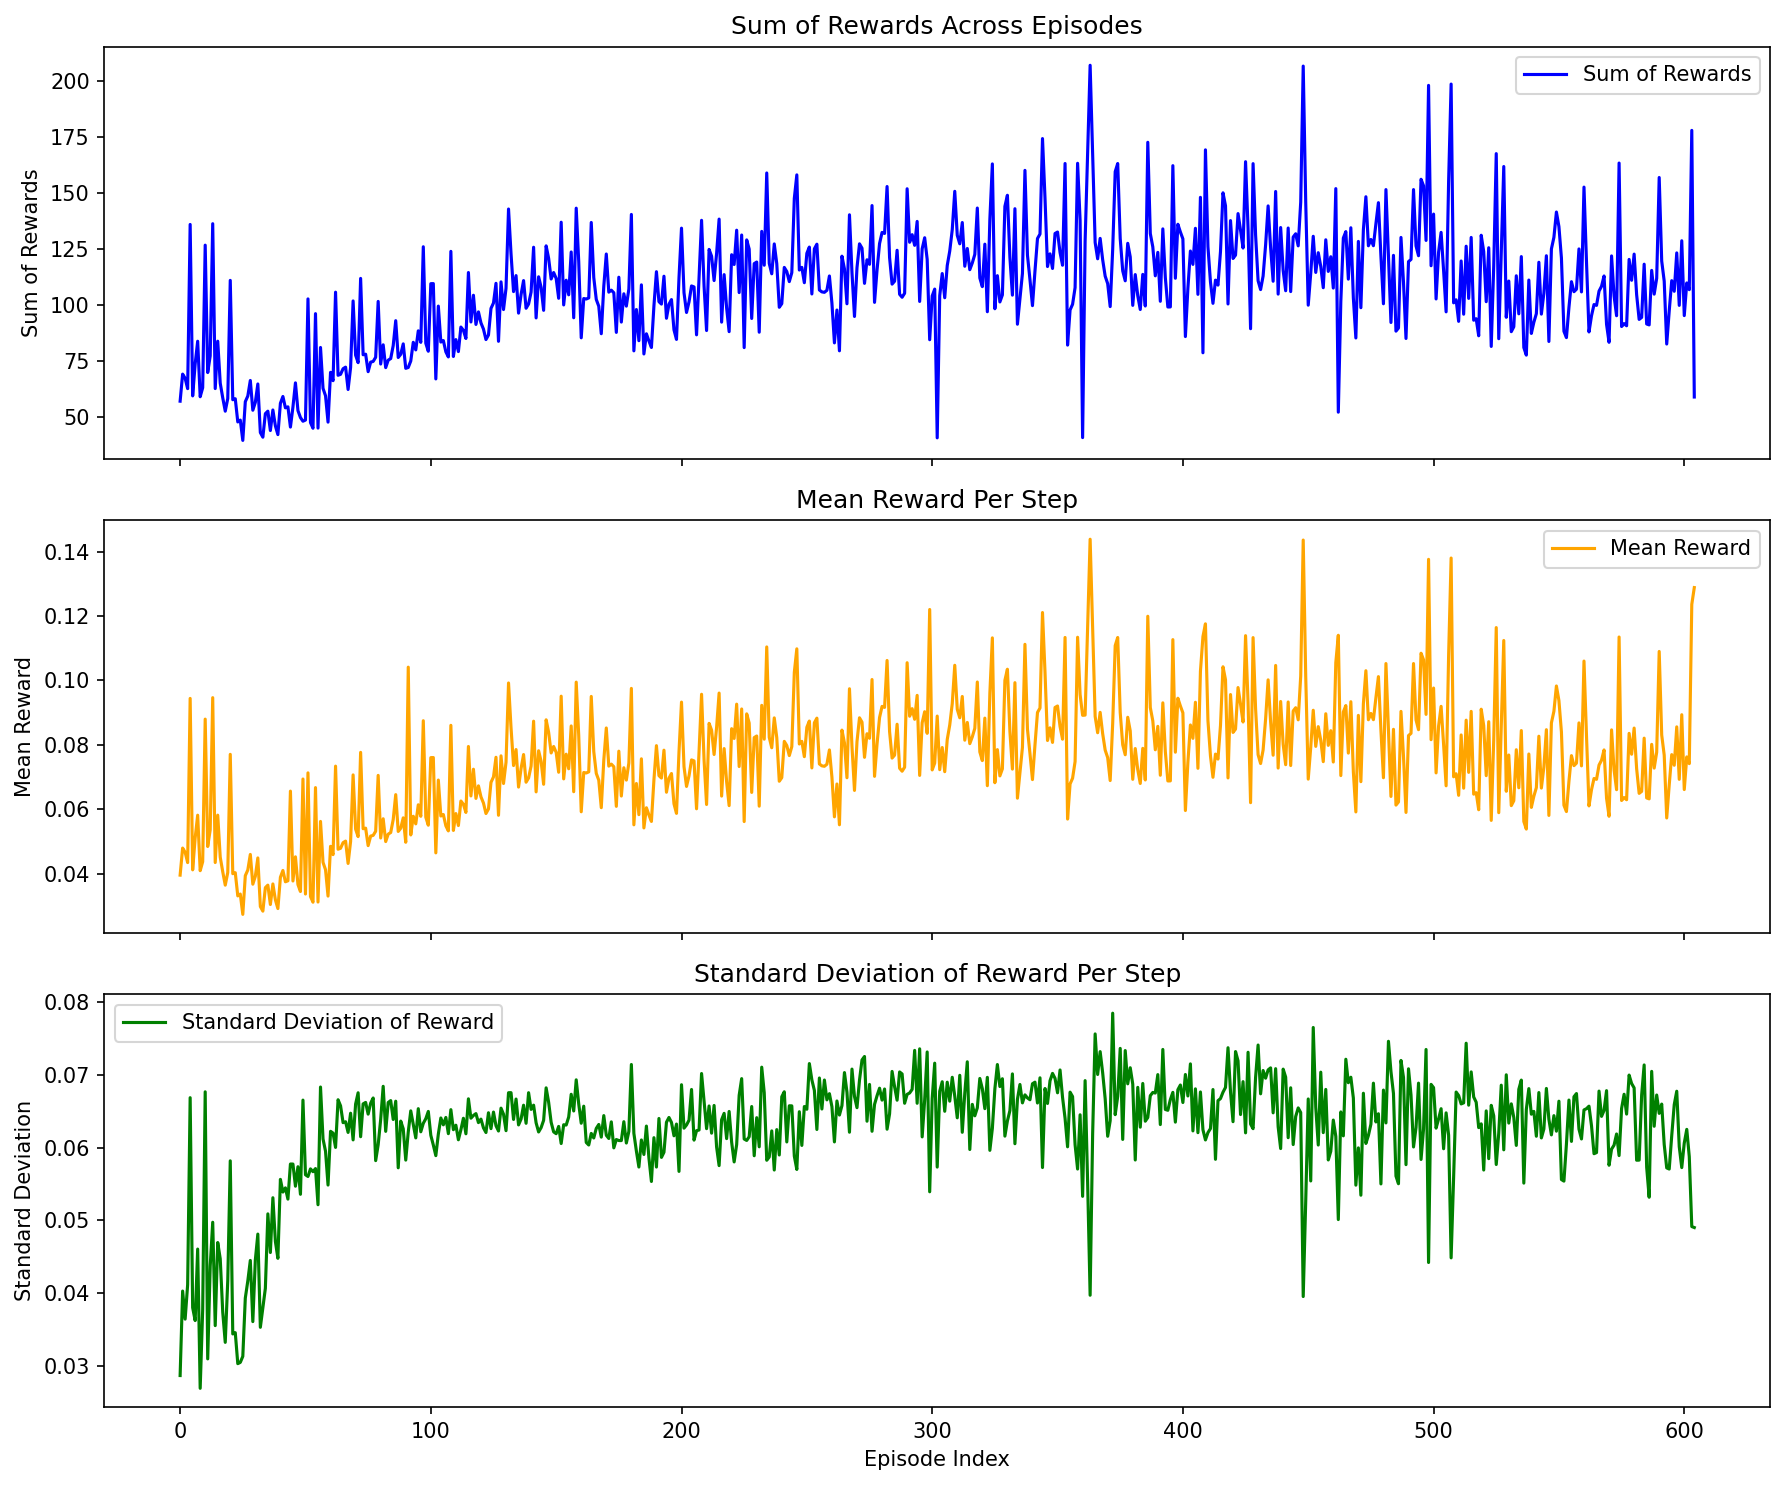

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = episodes_rewards_df.reset_index()
df_1.rename(columns={"index": "episode_index"}, inplace=True)

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True, dpi=150)
# Plot the sum of rewards across episodes
sns.lineplot(data=df_1, x="episode_index", y="sum", ax=ax1, label="Sum of Rewards", color="blue")
ax1.set_title("Sum of Rewards Across Episodes")
ax1.set_ylabel("Sum of Rewards")
ax1.legend()

# Plot the mean and std of per-step reward
# with the sd provided from df_1['std']
sns.lineplot(data=df_1, x="episode_index", y="mean", ax=ax2, label="Mean Reward", color="orange")
ax2.set_title("Mean Reward Per Step")
ax2.set_ylabel("Mean Reward")
ax2.legend()

# Plot the standard deviation of per-step reward
sns.lineplot(data=df_1, x="episode_index", y="std", ax=ax3, label="Standard Deviation of Reward", color="green")
ax3.set_title("Standard Deviation of Reward Per Step")
ax3.set_ylabel("Standard Deviation")
ax3.legend()

plt.xlabel("Episode Index")
plt.tight_layout()
plt.show()

# Save the figure
episodes_rewards_path = expt_folder / "graphs" / "episodes_rewards.png"
if not episodes_rewards_path.parent.exists():
    episodes_rewards_path.parent.mkdir(parents=True)
fig.savefig(episodes_rewards_path, dpi=300, bbox_inches='tight')

---

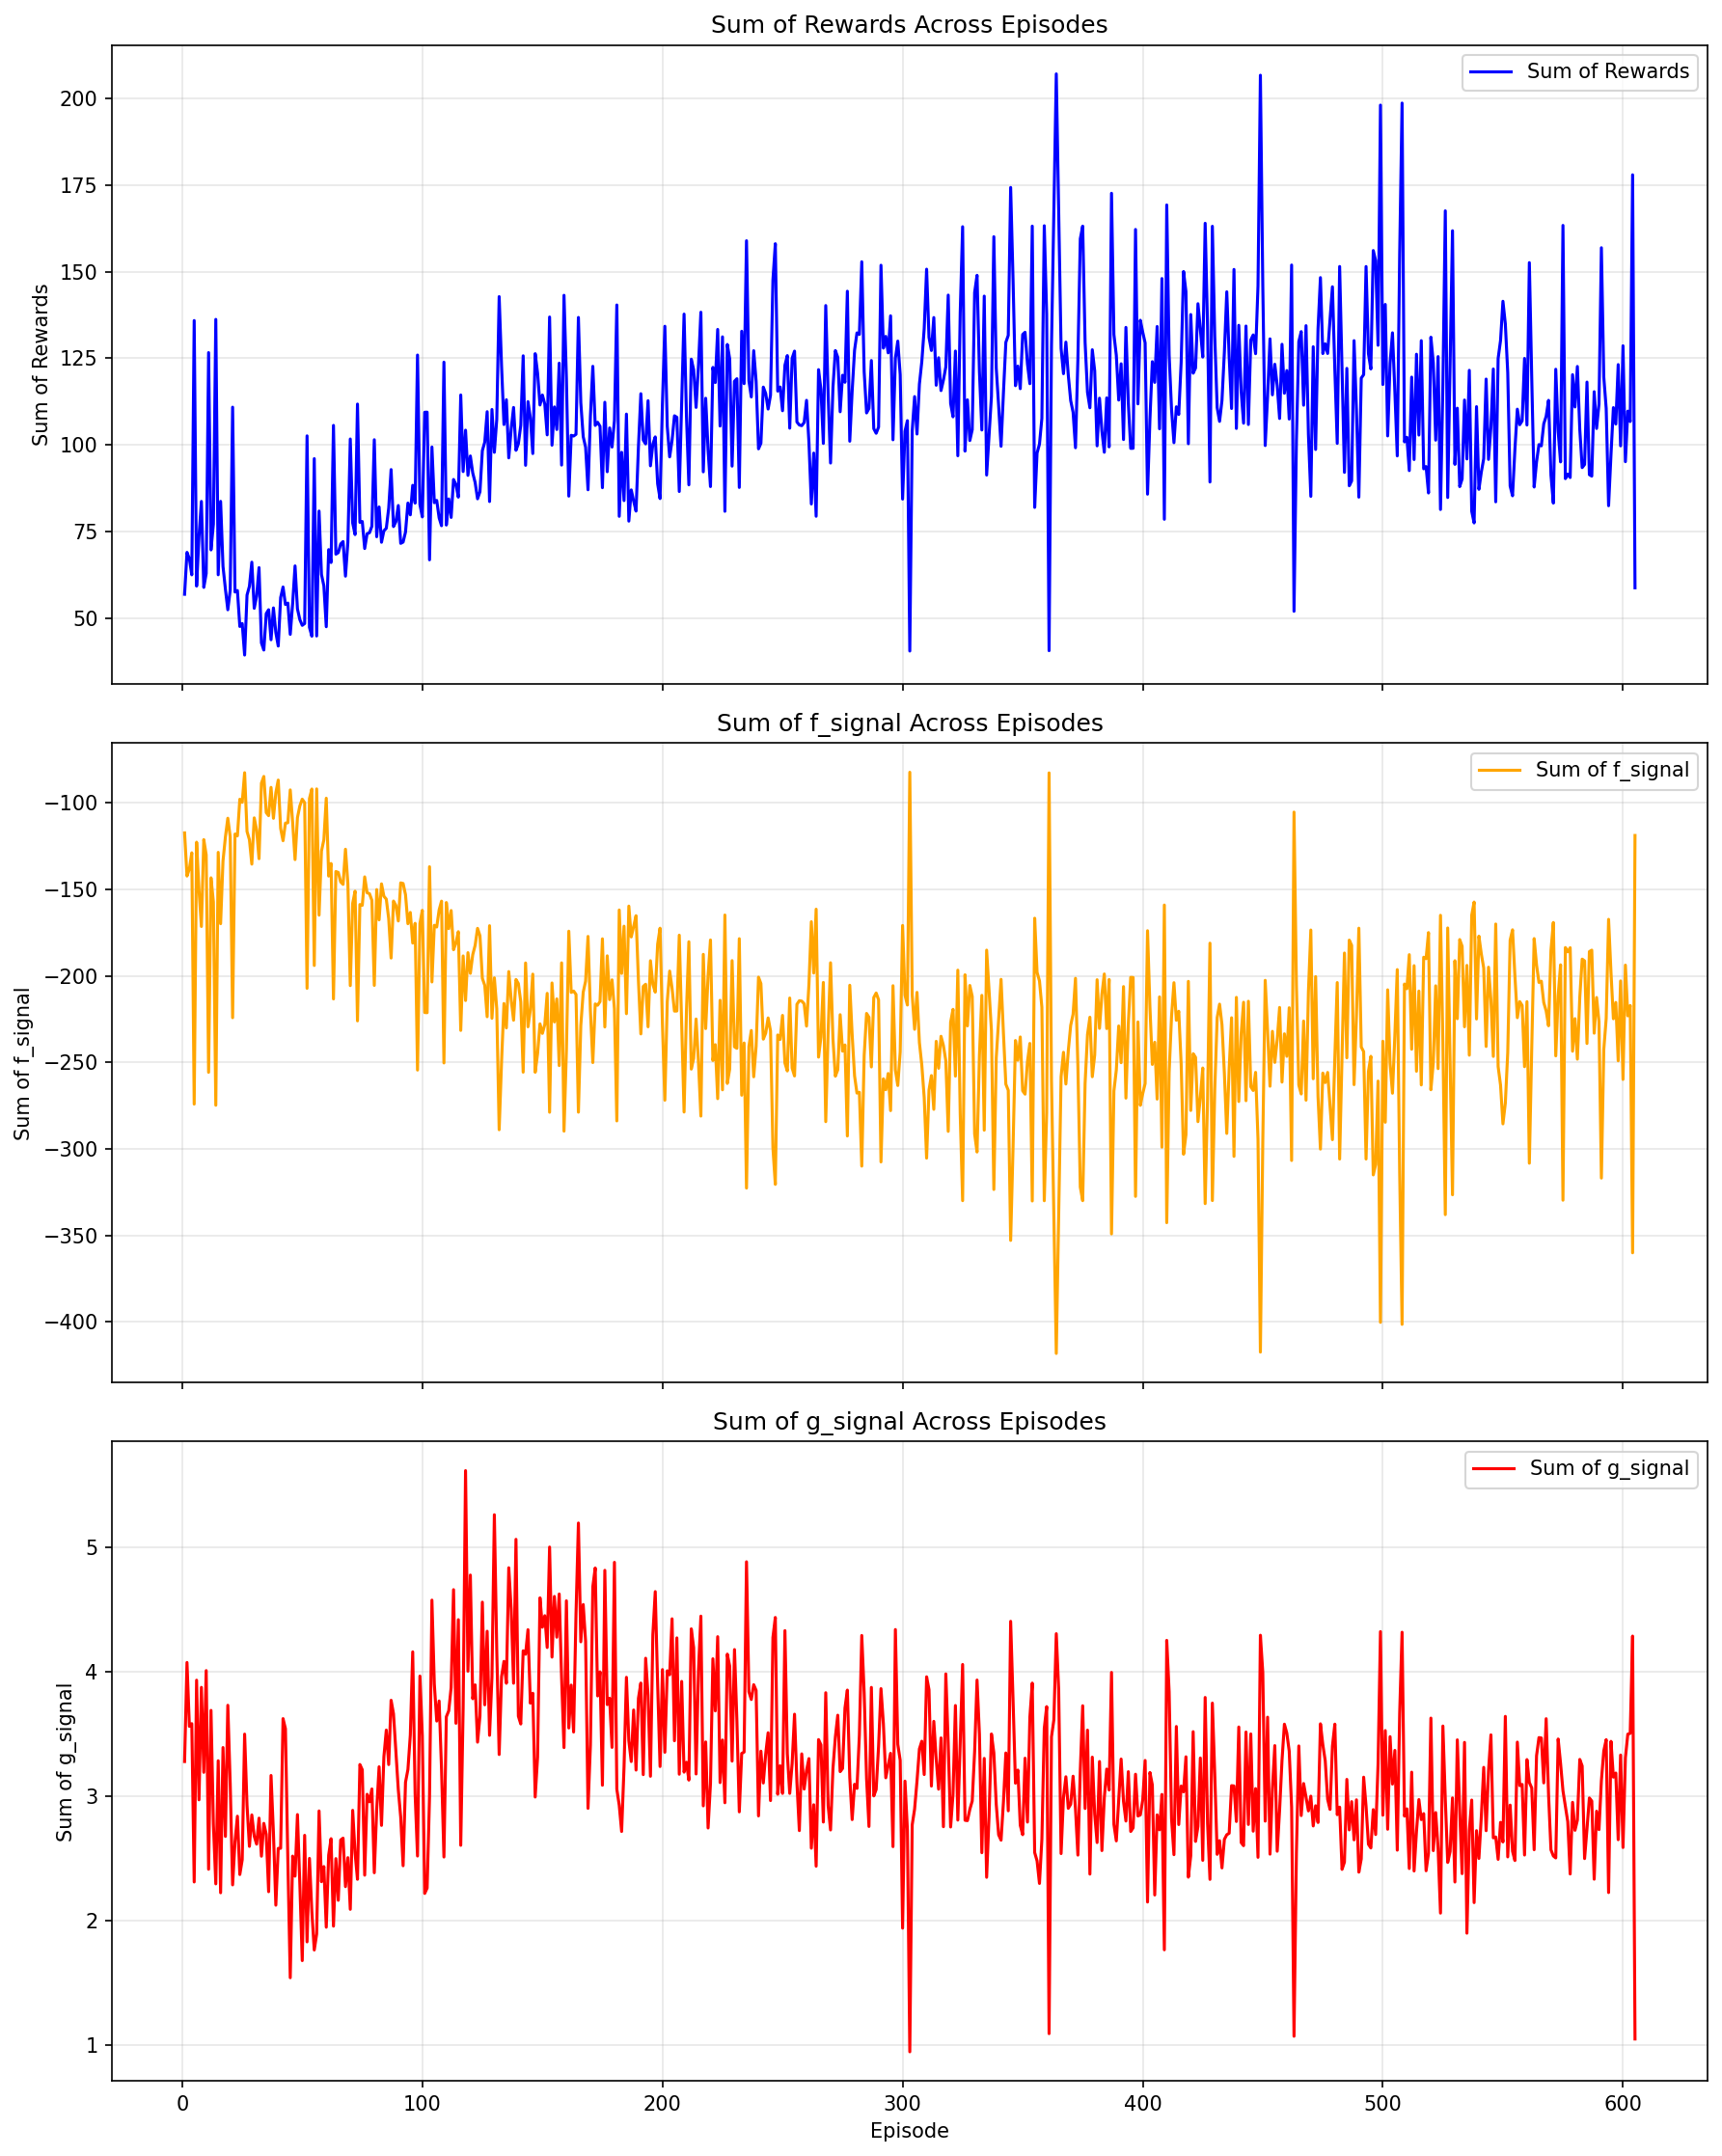

In [17]:
# we plot how the sum of f-signal and sum of g-signal changes over episodes
# we create three subplots, one for sum of rewards across episodes, one for sum of f-signal across episodes, and one for sum of g-signal across episodes

# Create a temporary dataframe with aggregated values per episode
episode_summary = episode_info_df.groupby('episode').agg({
    'reward': 'sum',
    'f_signal': 'sum', 
    'g_signal': 'sum'
}).reset_index()

# Create the three subplot figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True, dpi=150)

# Plot sum of rewards across episodes
sns.lineplot(data=episode_summary, x="episode", y="reward", ax=ax1, label="Sum of Rewards", color="blue")
ax1.set_title("Sum of Rewards Across Episodes")
ax1.set_ylabel("Sum of Rewards")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot sum of f_signal across episodes
sns.lineplot(data=episode_summary, x="episode", y="f_signal", ax=ax2, label="Sum of f_signal", color="orange")
ax2.set_title("Sum of f_signal Across Episodes")
ax2.set_ylabel("Sum of f_signal")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sum of g_signal across episodes
sns.lineplot(data=episode_summary, x="episode", y="g_signal", ax=ax3, label="Sum of g_signal", color="red")
ax3.set_title("Sum of g_signal Across Episodes")
ax3.set_ylabel("Sum of g_signal")
ax3.set_xlabel("Episode")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
signals_summary_path = expt_folder / "graphs" / "signals_summary.png"
if not signals_summary_path.parent.exists():
    signals_summary_path.parent.mkdir(parents=True)
fig.savefig(signals_summary_path, dpi=300, bbox_inches='tight')

plt.show()

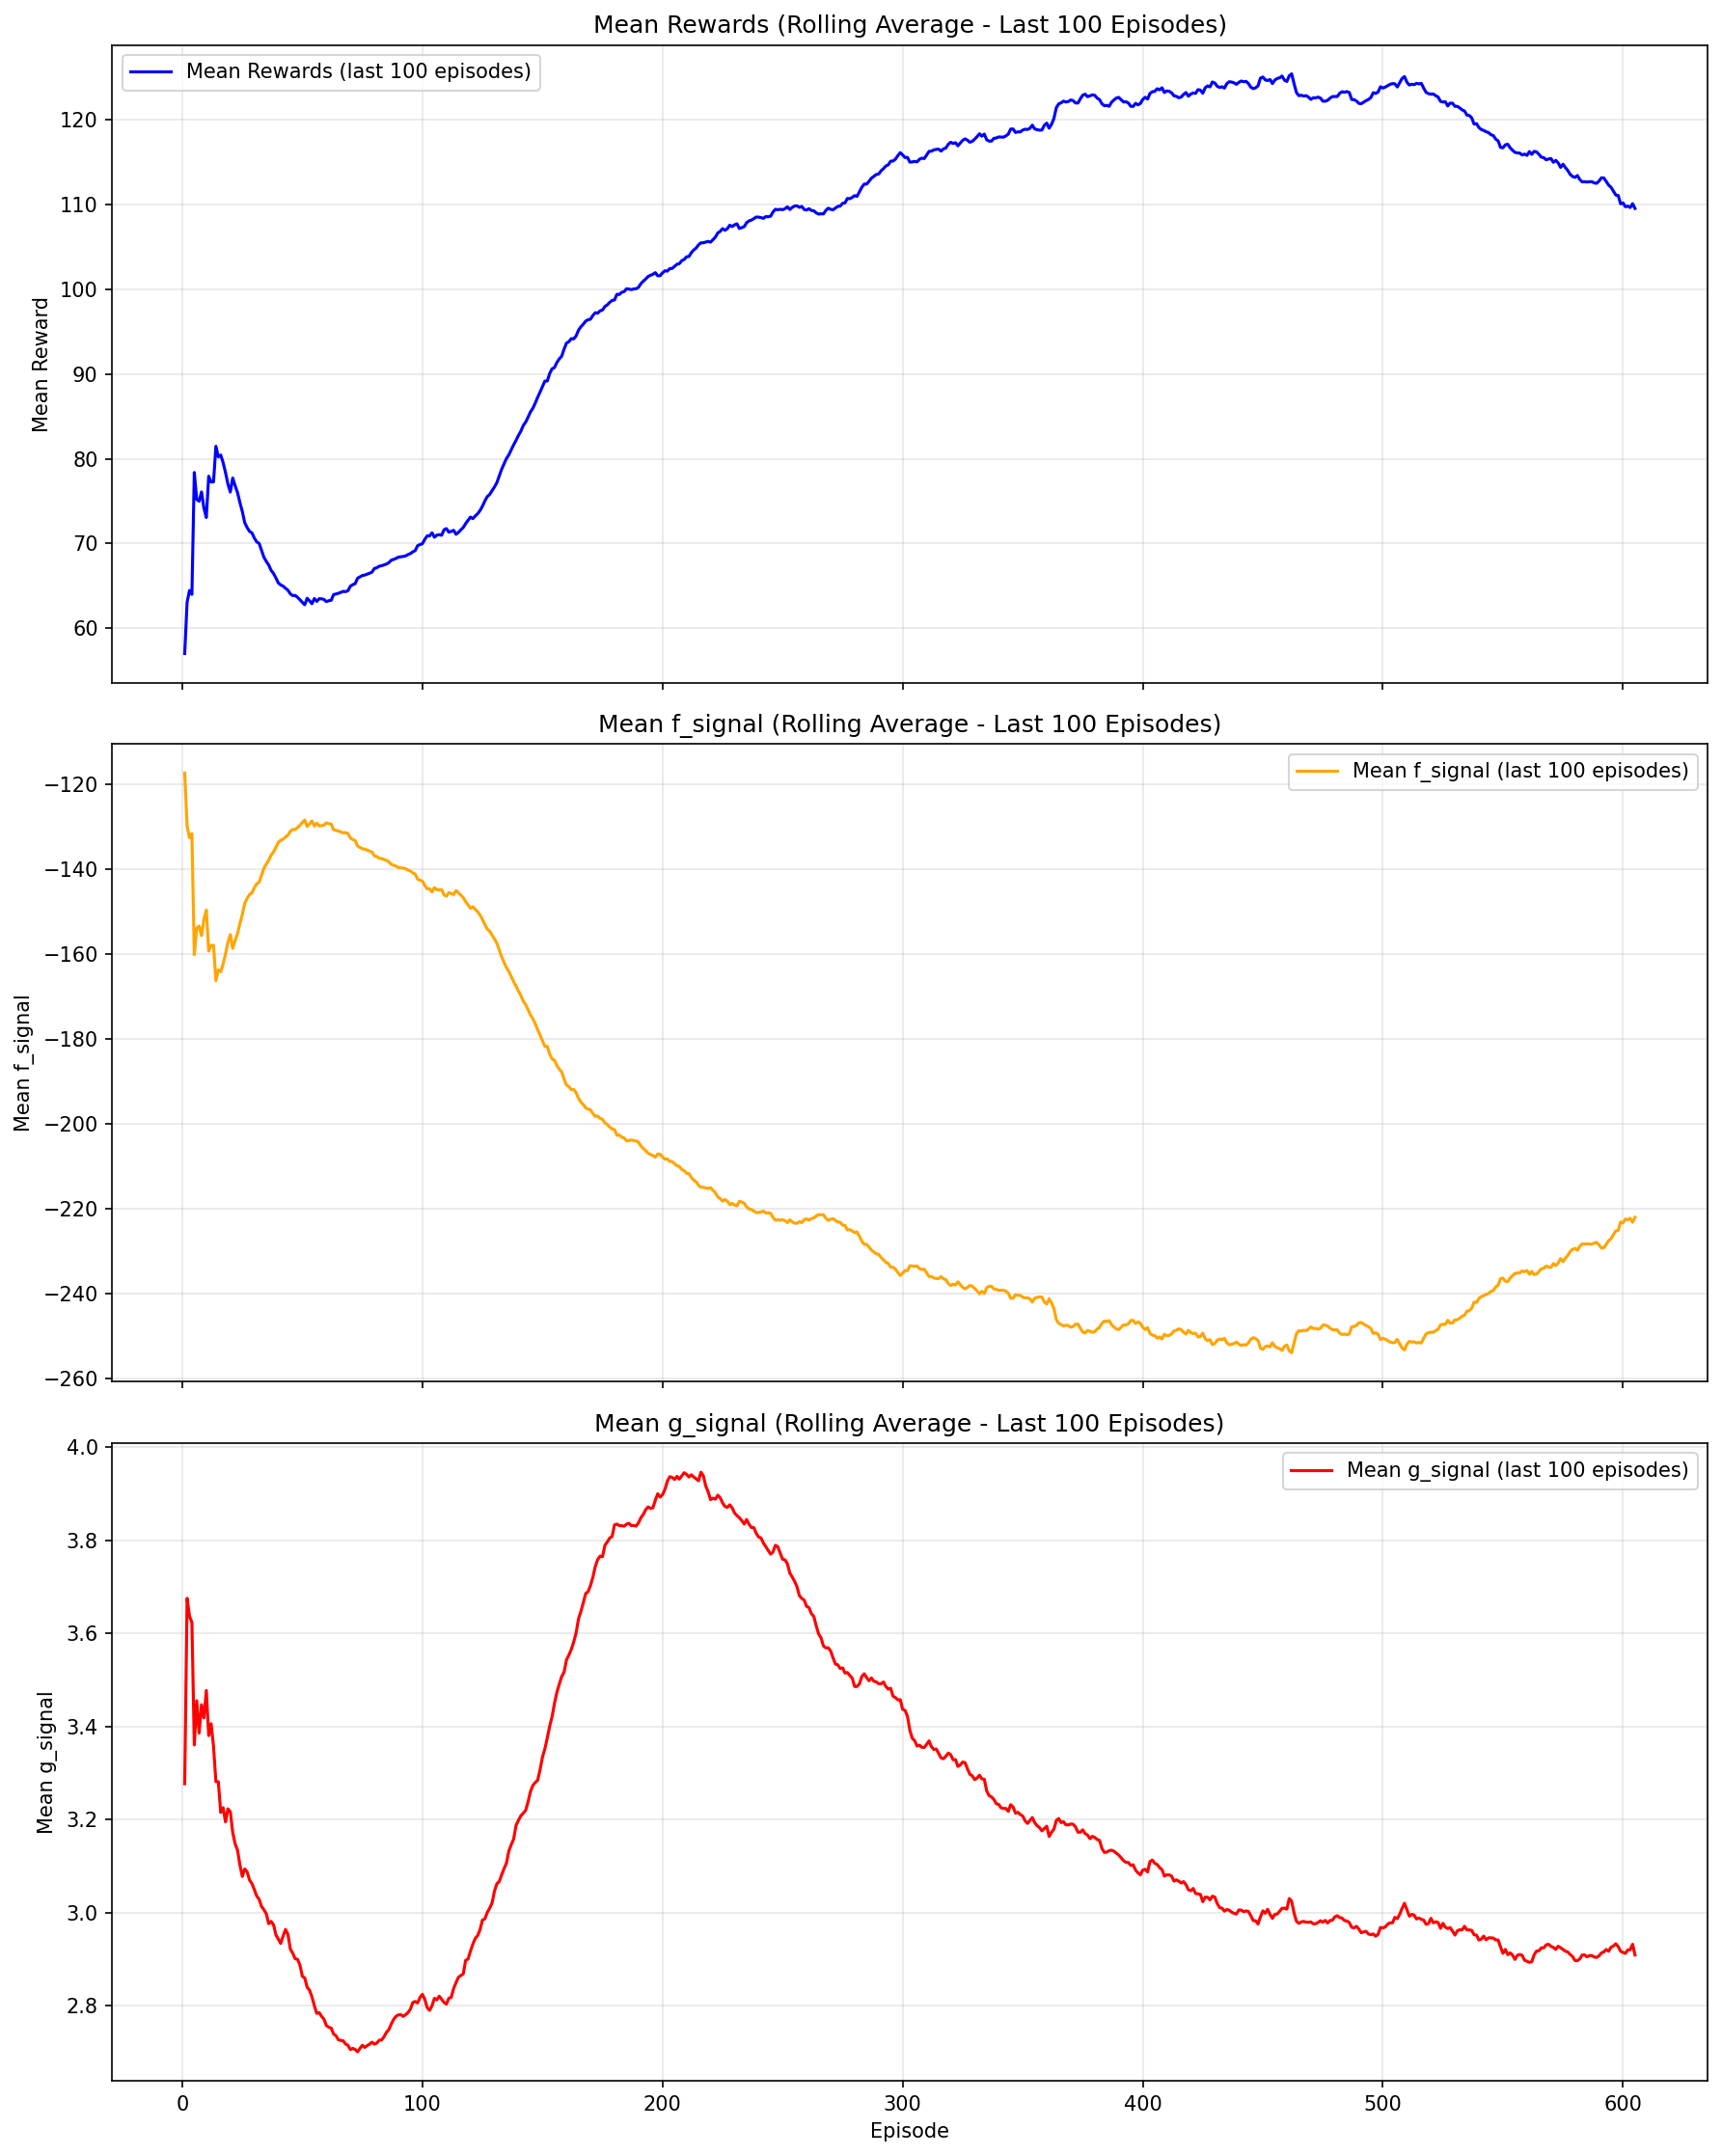

[2025-07-27 14:35:45:427] Rolling average window size: 100 episodes
[2025-07-27 14:35:45:428] Final rolling mean reward: 109.523
[2025-07-27 14:35:45:428] Final rolling mean f_signal: -221.956
[2025-07-27 14:35:45:428] Final rolling mean g_signal: 2.909


In [18]:
# Create SB3-style rolling average plot (ep_rew_mean equivalent)
# Calculate rolling average over last 100 episodes (similar to stable-baselines3 ep_rew_mean)

window_size = 100  # Default stats_window_size in stable-baselines3

# Create rolling averages for each metric
episode_summary_sb3 = episode_summary.copy()
episode_summary_sb3['reward_mean_100'] = episode_summary_sb3['reward'].rolling(window=window_size, min_periods=1).mean()
episode_summary_sb3['f_signal_mean_100'] = episode_summary_sb3['f_signal'].rolling(window=window_size, min_periods=1).mean()
episode_summary_sb3['g_signal_mean_100'] = episode_summary_sb3['g_signal'].rolling(window=window_size, min_periods=1).mean()

# Create the three subplot figure with SB3-style rolling averages
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True, dpi=150)

# Plot rolling mean of rewards (equivalent to ep_rew_mean in SB3)
sns.lineplot(data=episode_summary_sb3, x="episode", y="reward_mean_100", ax=ax1, label=f"Mean Rewards (last {window_size} episodes)", color="blue")
ax1.set_title(f"Mean Rewards (Rolling Average - Last {window_size} Episodes)")
ax1.set_ylabel("Mean Reward")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot rolling mean of f_signal
sns.lineplot(data=episode_summary_sb3, x="episode", y="f_signal_mean_100", ax=ax2, label=f"Mean f_signal (last {window_size} episodes)", color="orange")
ax2.set_title(f"Mean f_signal (Rolling Average - Last {window_size} Episodes)")
ax2.set_ylabel("Mean f_signal")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot rolling mean of g_signal
sns.lineplot(data=episode_summary_sb3, x="episode", y="g_signal_mean_100", ax=ax3, label=f"Mean g_signal (last {window_size} episodes)", color="red")
ax3.set_title(f"Mean g_signal (Rolling Average - Last {window_size} Episodes)")
ax3.set_ylabel("Mean g_signal")
ax3.set_xlabel("Episode")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
sb3_style_path = expt_folder / "graphs" / "sb3_style_rolling_average.png"
if not sb3_style_path.parent.exists():
    sb3_style_path.parent.mkdir(parents=True)
# fig.savefig(sb3_style_path, dpi=300, bbox_inches='tight')

plt.show()

# Display some statistics
print_log(f"Rolling average window size: {window_size} episodes")
print_log(f"Final rolling mean reward: {episode_summary_sb3['reward_mean_100'].iloc[-1]:.3f}")
print_log(f"Final rolling mean f_signal: {episode_summary_sb3['f_signal_mean_100'].iloc[-1]:.3f}")
print_log(f"Final rolling mean g_signal: {episode_summary_sb3['g_signal_mean_100'].iloc[-1]:.3f}")

---

A better visualization is plot the same data using the `episode_info_df`, especially the mean and sd reward per episode (as the df is in long form w.r.t. episode index), with the sd is plotted using errorbar

We also plot how the f_signal and g_signal changes over episodes

/tmp/ipykernel_1061765/3444335868.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


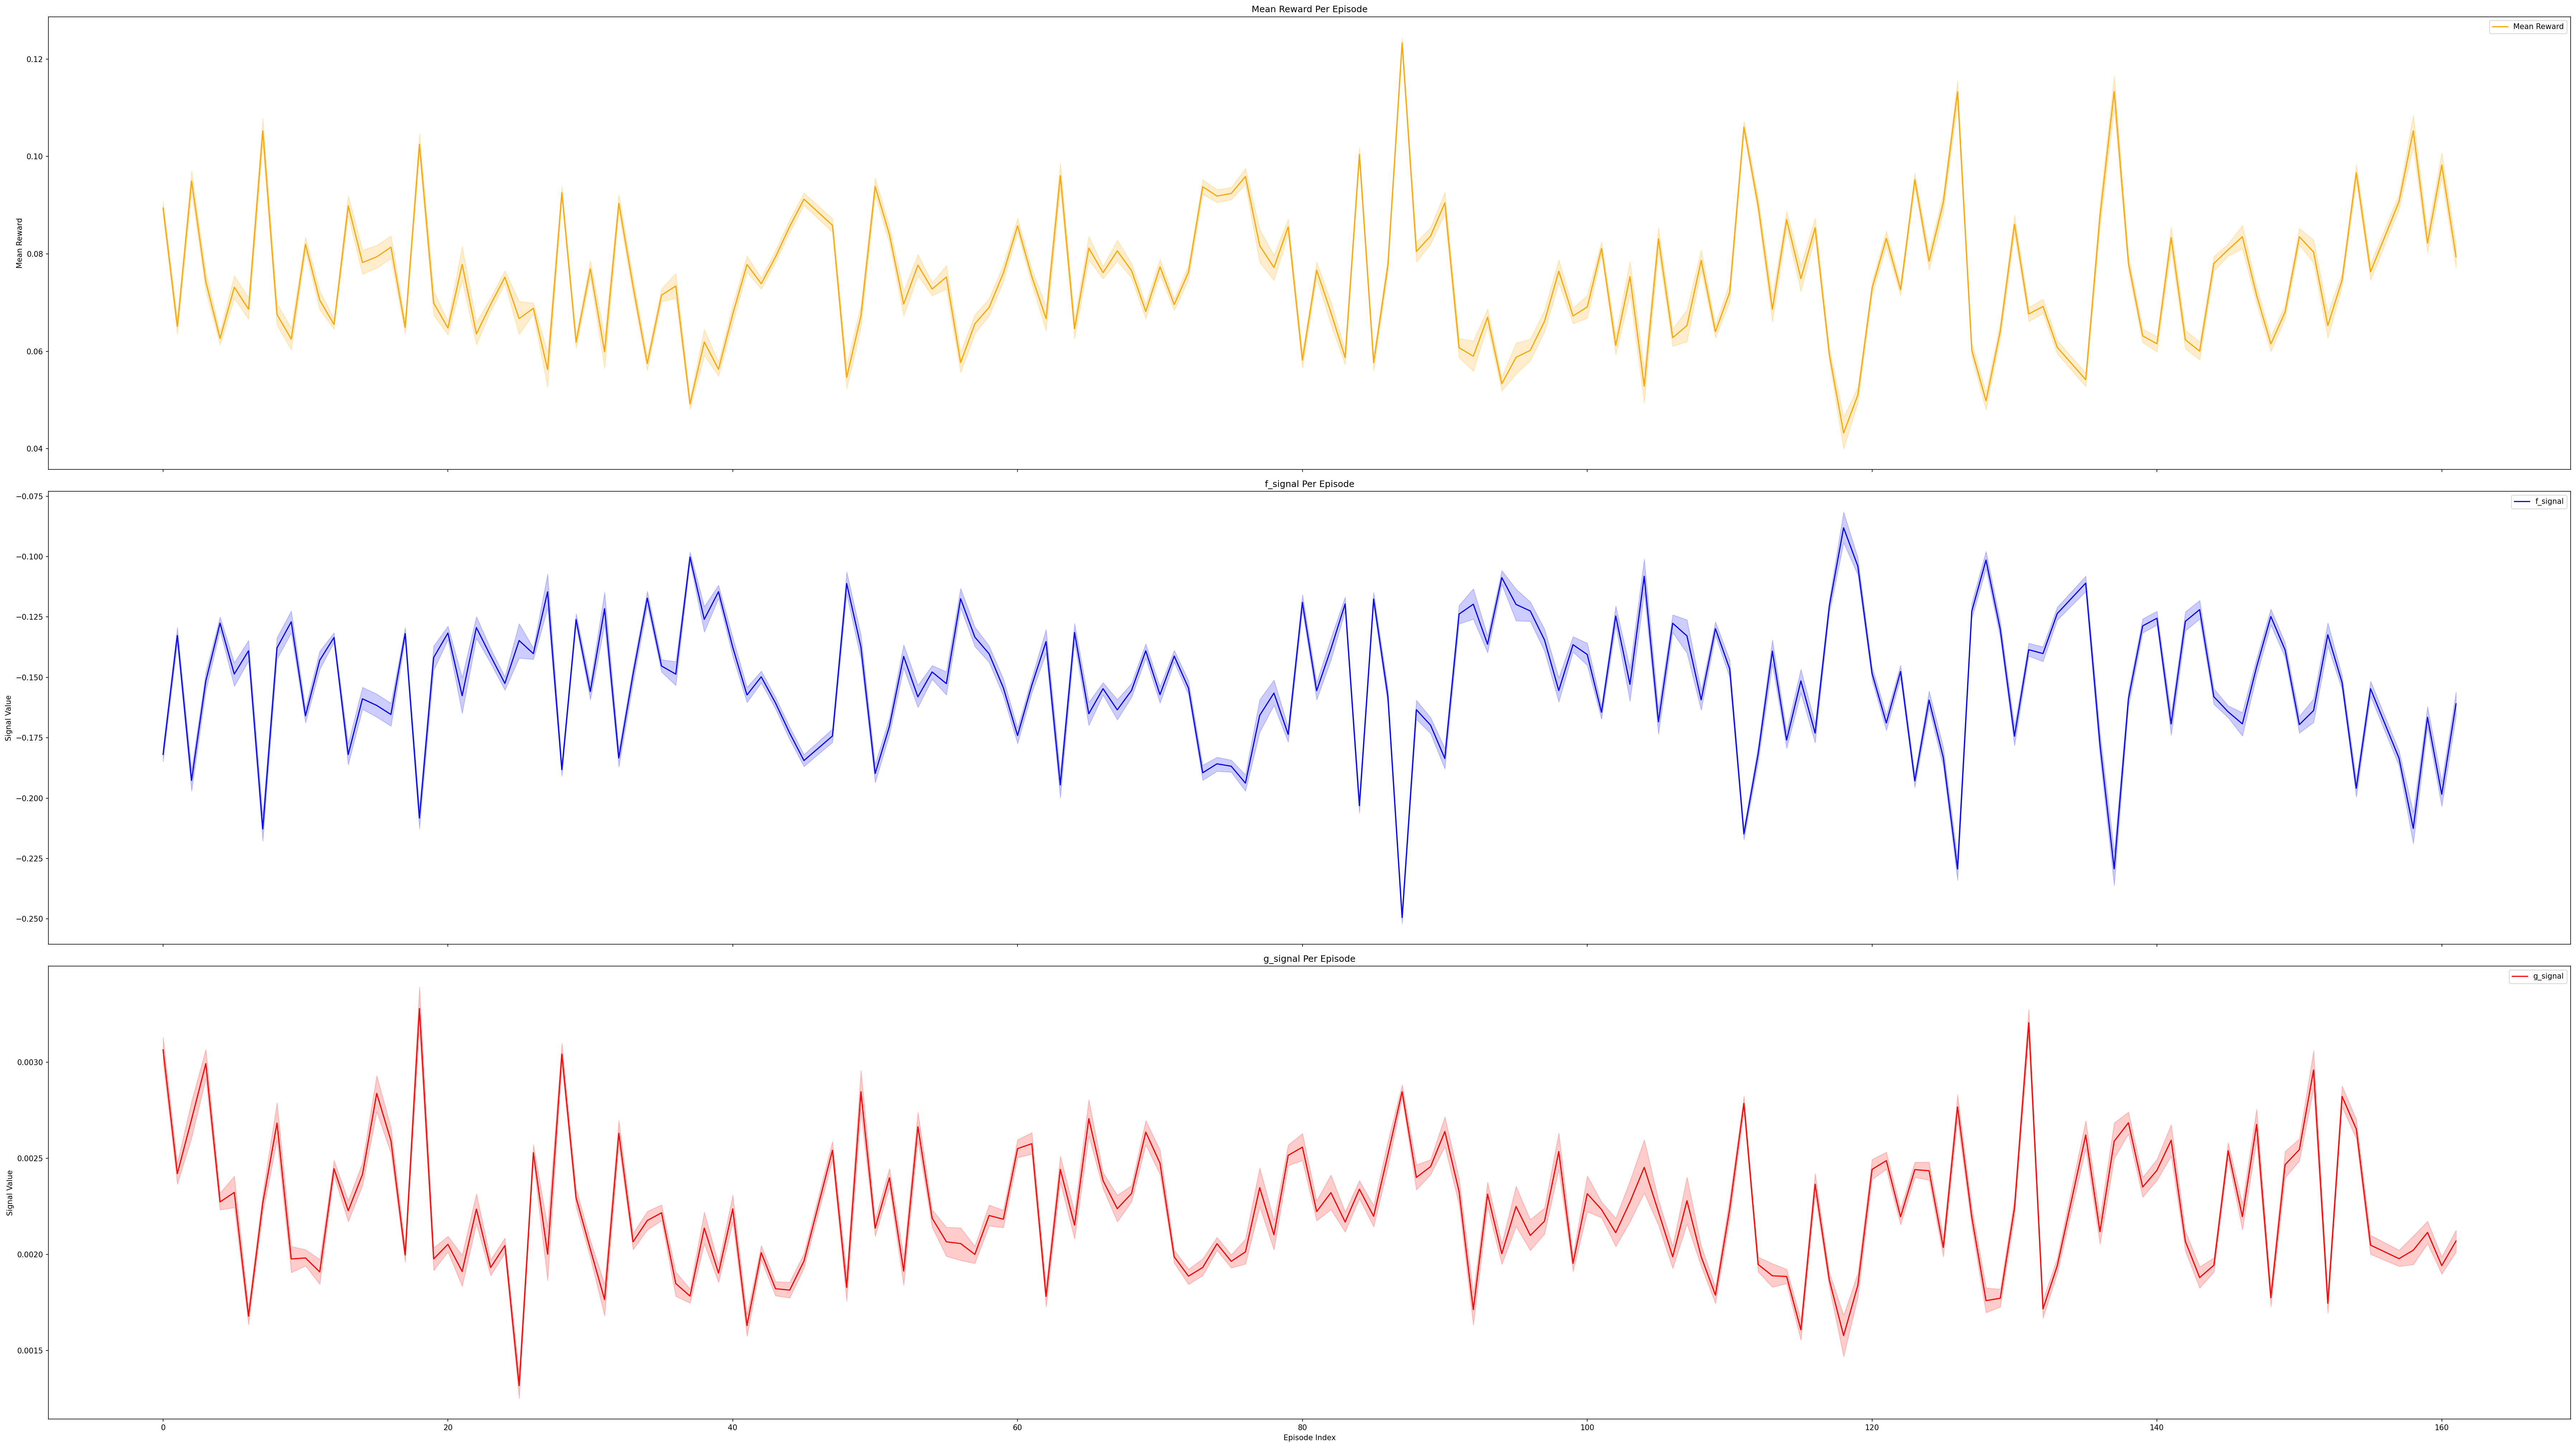

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(48,27), sharex=True, dpi=150)

# Plot the mean and std of per-step reward from episode_info_df
sns.lineplot(data=episode_info_df, x="episode_index", y="reward", ax=ax1, label="Mean Reward", color="orange")
ax1.set_title("Mean Reward Per Episode")
ax1.set_ylabel("Mean Reward")
ax1.legend()

# plot the mean & sd of f_signal and g_signal
sns.lineplot(data=episode_info_df, x="episode_index", y="f_signal", ax=ax2, label="f_signal", color="blue")
ax2.set_title("f_signal Per Episode")
ax2.set_ylabel("Signal Value")
ax2.legend()

sns.lineplot(data=episode_info_df, x="episode_index", y="g_signal", ax=ax3, label="g_signal", color="red")
ax3.set_title("g_signal Per Episode")
ax3.set_ylabel("Signal Value")
ax3.legend()


plt.xlabel("Episode Index")
plt.tight_layout()

fig.savefig(expt_folder / "graphs" / "episode_info_plot.png", dpi=300, bbox_inches='tight')
fig.show()

We can also plot how the training loss of the H-network varies across episodes

In [20]:
h_network_loss_df

mean_loss  std_loss  num_batches
0     0.532556  0.046718            2
1     0.527398  0.012887            2
2     0.494941  0.016262            2
3     0.425450  0.053010            2
4     0.455040  0.011857            2
..         ...       ...          ...
116   0.008745  0.000984            2
117   0.015551  0.001422            2
118   0.011090  0.001917            2
119   0.008804  0.000191            2
120   0.006249  0.002316            2

[121 rows x 3 columns]

In [21]:
# add a column for the episode number, which is equal to (index + 1) * 5
# as the H-network is updated every 5 steps
h_network_loss_df['episode_index'] = (h_network_loss_df.index + 1) * 5

/tmp/ipykernel_1061765/1538420734.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


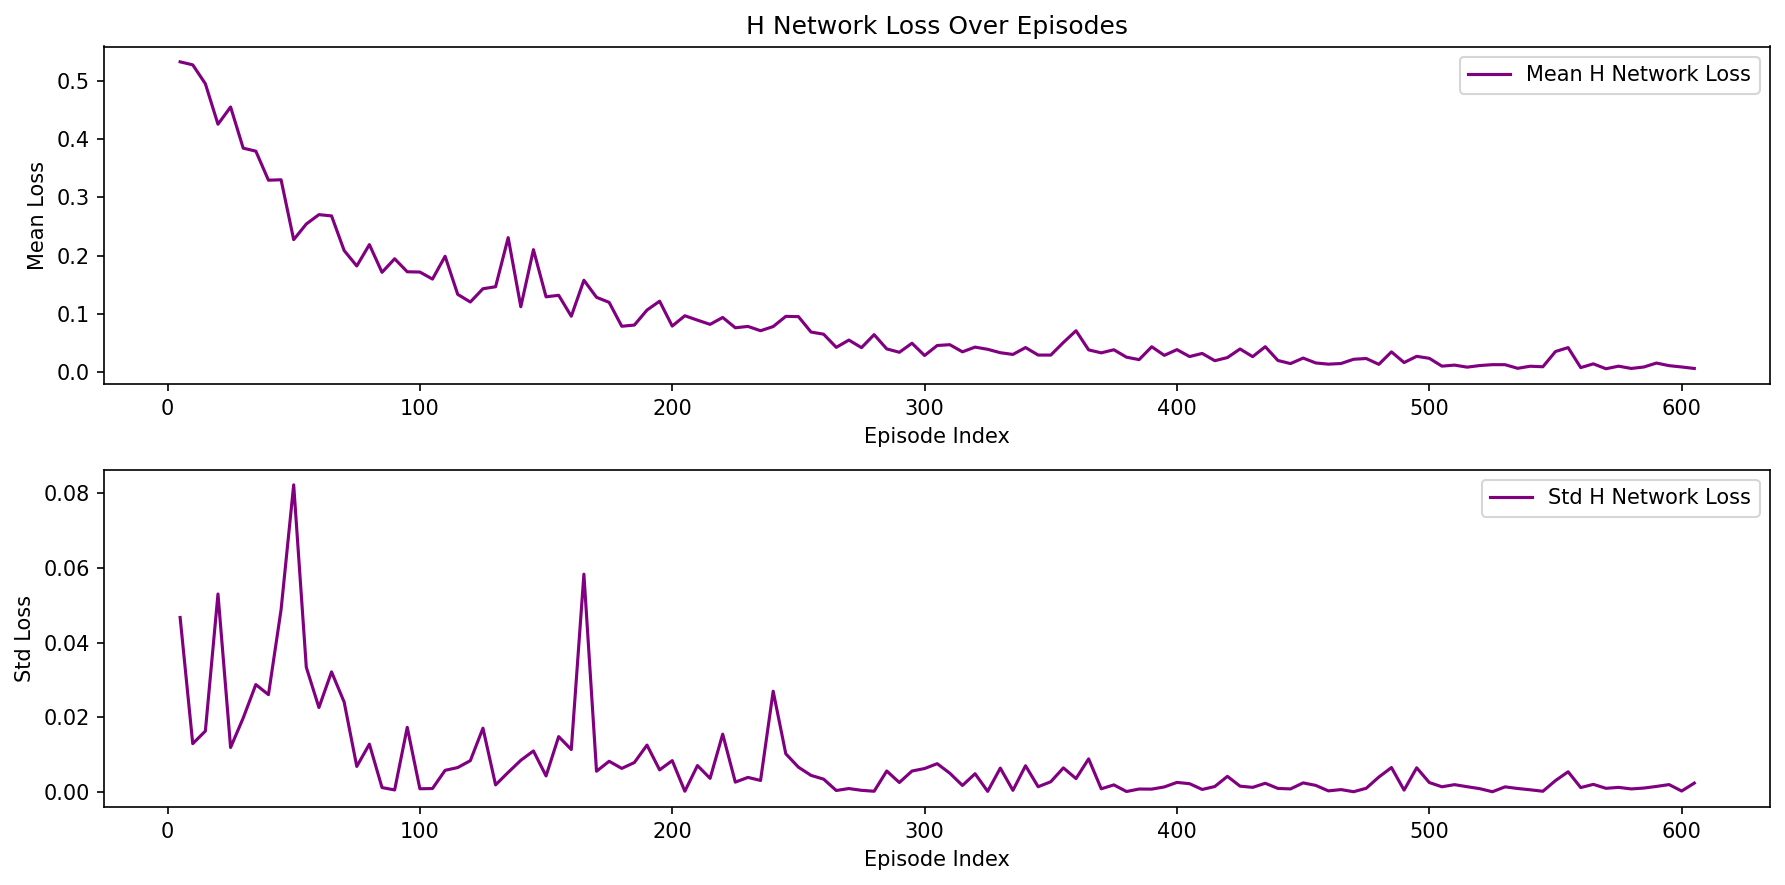

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the h_network_loss_df, both mean_loss and std_loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), dpi=150)
sns.lineplot(data=h_network_loss_df, x="episode_index", y="mean_loss", ax=ax1, label="Mean H Network Loss", color="purple")
sns.lineplot(data=h_network_loss_df, x="episode_index", y="std_loss", ax=ax2, label="Std H Network Loss", color="purple")
ax1.set_title("H Network Loss Over Episodes")
ax1.set_ylabel("Mean Loss")
ax1.set_xlabel("Episode Index")
ax2.set_ylabel("Std Loss")
ax2.set_xlabel("Episode Index")
ax1.legend()
ax2.legend()
plt.tight_layout()

fig.savefig(expt_folder / "graphs" / "h_network_loss_plot.png", dpi=300, bbox_inches='tight')
fig.show()


For each of the episode_info in episode_info_list, we first plot how the user load and grid load changes across time

It will be a graph with two subplot, with the first one ploting both user load and (masked) grid load, and the second one plotting the battery state-of-charge

For the second sub-plot, we have to calculate the colour of each point/line. The line will be green if the soc increases, and line wiil be red if the soc decreases, and blue if there's no change

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Plot individual episodes with user load, grid load, and battery SOC
def plot_episode_details(episode_df, episode_idx, save_path=None, use_datetime=False, show=True):
    """
    Plot episode details with user load, grid load, and battery SOC (updated with datetime option)
    
    Args:
        episode_df: DataFrame containing episode information
        episode_idx: Episode index for title
        save_path: Optional path to save the figure
        use_datetime: If True, use datetime as x-axis; if False, use step numbers
        show: If True, display the plot; if False, suppress display
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, dpi=150)
    
    # Determine x-axis values
    if use_datetime and 'datetime' in episode_df.columns:
        x_values = episode_df['datetime']
        x_label = 'Time'
    else:
        x_values = range(len(episode_df))
        x_label = 'Time Steps'

    episode_ittr = episode_df['episode'].iloc[0]  # Get the episode iteration number for title
    
    # First subplot: User load and Grid load
    ax1.plot(x_values, episode_df['user_load (W)'], label='User Load', color='blue', linewidth=2)
    ax1.plot(x_values, episode_df['grid_load (W)'], label='Grid Load (Masked)', color='pink', linewidth=2, alpha=0.8)

    ax1.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Load Profiles Over Time')
    ax1.set_ylabel('Power (W)')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Second subplot: Battery SOC with color coding using LineCollection
    soc_values = episode_df['battery_soc (kWh)'].values
    
    # Calculate SOC changes
    soc_changes = np.diff(soc_values)
    
    # Create numerical color array based on SOC changes for smooth coloring
    # -1: red (decreasing), 0: blue (no change), 1: green (increasing)
    color_values = []
    for change in soc_changes:
        if change > 1e-6:  # Small threshold to handle floating point precision
            color_values.append(1)    # SOC increases (green)
        elif change < -1e-6:
            color_values.append(-1)   # SOC decreases (red)
        else:
            color_values.append(0)    # No change (blue)
    
    # Create line segments for LineCollection
    if use_datetime and 'datetime' in episode_df.columns:
        # Convert datetime to matplotlib date numbers for LineCollection
        from matplotlib.dates import date2num
        x_numeric = date2num(episode_df['datetime'])
    else:
        x_numeric = np.array(range(len(episode_df)))
    
    points = np.array([x_numeric, soc_values]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create LineCollection with custom colormap
    lc = LineCollection(segments, linewidth=3, capstyle='round')
    lc.set_array(np.array(color_values))
    
    # Create custom colormap: red (-1) -> blue (0) -> green (1)
    colors_map = ['red', 'blue', 'green']
    cmap = ListedColormap(colors_map, name='soc_change', N=3)
    
    lc.set_cmap(cmap)
    lc.set_clim(-1, 1)
    
    # Add the line collection to the plot
    line = ax2.add_collection(lc)

    ax2.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Battery State of Charge Over Time')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('SOC (kWh)')
    ax2.grid(True, alpha=0.3)
    
    # Set axis limits for better visualization
    if use_datetime and 'datetime' in episode_df.columns:
        ax2.set_xlim(episode_df['datetime'].iloc[0], episode_df['datetime'].iloc[-1])
    else:
        ax2.set_xlim(0, len(episode_df)-1)
    ax2.set_ylim(soc_values.min() * 0.95, soc_values.max() * 1.05)
    
    # Add legend for SOC colors
    legend_elements = [Patch(facecolor='green', label='SOC Increasing'),
                      Patch(facecolor='red', label='SOC Decreasing'),
                      Patch(facecolor='blue', label='SOC No Change')]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Format datetime axis if using datetime
    if use_datetime and 'datetime' in episode_df.columns:
        from matplotlib.dates import DateFormatter
        # Format the datetime axis
        formatter = DateFormatter('%H:%M:%S')
        for ax in [ax1, ax2]:
            ax.xaxis.set_major_formatter(formatter)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')

    if show:
        plt.show()
    return fig

# Plot details for selected episodes (first 5 episodes as example)
# You can modify the range to plot more or specific episodes
# episodes_to_plot = range(min(1, len(episode_info_dfs)))  # Plot first 5 episodes or all if less than 5
# episodes_to_plot = [66]  # Plot first 5 episodes or all if less than 5

# for i in episodes_to_plot:
#     episode_df = episode_info_dfs[i]
#     episode_idx = episode_df['episode_index'].iloc[0]  # Get the actual episode index
    
#     print_log(f"Plotting episode {episode_idx} @ ittr {i} details...")
    
#     # Create save path for individual episode plots
#     save_path = expt_folder / "graphs" / "per_episode" /f"episode_{episode_idx}_details.png"

#     fig = plot_episode_details(episode_df, episode_idx, save_path=None, use_datetime=True, show=True)

#     # Close the figure to free memory
#     # plt.close(fig)

In [17]:
episode_df

NameError: name 'episode_df' is not defined

In [18]:
# Plot individual episodes with three separate subplots
def plot_episode_details_three_subplots(episode_df, episode_idx, save_path=None, use_datetime=False, show=True):
    """
    Plot episode details with three separate subplots: user load, grid load, and battery SOC
    
    Args:
        episode_df: DataFrame containing episode information
        episode_idx: Episode index for title
        save_path: Optional path to save the figure
        use_datetime: If True, use datetime as x-axis; if False, use step numbers
        show: If True, display the plot; if False, suppress display
    """
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15), sharex=True, dpi=150)
    
    # Determine x-axis values
    if use_datetime and 'datetime' in episode_df.columns:
        x_values = episode_df['datetime']
        x_label = 'Time'
    else:
        x_values = range(len(episode_df))
        x_label = 'Time Steps'

    episode_ittr = episode_df['episode'].iloc[0]  # Get the episode iteration number for title
    
    # First subplot: User load only
    ax1.plot(x_values, episode_df['user_load (W)'], label='User Load', color='blue', linewidth=2)
    ax1.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: User Load Over Time')
    ax1.set_ylabel('Power (W)')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Second subplot: Grid load only  
    ax2.plot(x_values, episode_df['grid_load (W)'], label='Grid Load (Masked)', color='orange', linewidth=2, alpha=0.8)
    ax2.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Grid Load (Masked) Over Time')
    ax2.set_ylabel('Power (W)')
    ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    # Third subplot: Battery SOC with color coding using LineCollection
    soc_values = episode_df['battery_soc (kWh)'].values
    
    # Calculate SOC changes
    soc_changes = np.diff(soc_values)
    
    # Create numerical color array based on SOC changes for smooth coloring
    # -1: red (decreasing), 0: blue (no change), 1: green (increasing)
    color_values = []
    for change in soc_changes:
        if change > 1e-6:  # Small threshold to handle floating point precision
            color_values.append(1)    # SOC increases (green)
        elif change < -1e-6:
            color_values.append(-1)   # SOC decreases (red)
        else:
            color_values.append(0)    # No change (blue)
    
    # Create line segments for LineCollection
    if use_datetime and 'datetime' in episode_df.columns:
        # Convert datetime to matplotlib date numbers for LineCollection
        from matplotlib.dates import date2num
        x_numeric = date2num(episode_df['datetime'])
    else:
        x_numeric = np.array(range(len(episode_df)))
    
    points = np.array([x_numeric, soc_values]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create LineCollection with custom colormap
    lc = LineCollection(segments, linewidth=3, capstyle='round')
    lc.set_array(np.array(color_values))
    
    # Create custom colormap: red (-1) -> blue (0) -> green (1)
    colors_map = ['red', 'blue', 'green']
    cmap = ListedColormap(colors_map, name='soc_change', N=3)
    
    lc.set_cmap(cmap)
    lc.set_clim(-1, 1)
    
    # Add the line collection to the plot
    line = ax3.add_collection(lc)

    ax3.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Battery State of Charge Over Time')
    ax3.set_xlabel(x_label)
    ax3.set_ylabel('SOC (kWh)')
    ax3.grid(True, alpha=0.3)
    
    # Set axis limits for better visualization
    if use_datetime and 'datetime' in episode_df.columns:
        ax3.set_xlim(episode_df['datetime'].iloc[0], episode_df['datetime'].iloc[-1])
    else:
        ax3.set_xlim(0, len(episode_df)-1)
    ax3.set_ylim(soc_values.min() * 0.95, soc_values.max() * 1.05)
    
    # Add legend for SOC colors
    legend_elements = [Patch(facecolor='green', label='SOC Increasing'),
                      Patch(facecolor='red', label='SOC Decreasing'),
                      Patch(facecolor='blue', label='SOC No Change')]
    ax3.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Format datetime axis if using datetime
    if use_datetime and 'datetime' in episode_df.columns:
        from matplotlib.dates import DateFormatter
        # Format the datetime axis
        formatter = DateFormatter('%H:%M:%S')
        for ax in [ax1, ax2, ax3]:
            ax.xaxis.set_major_formatter(formatter)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')

    if show:
        plt.show()
    return fig

[2025-07-27 01:50:09:661] Creating three-subplot version with datetime...


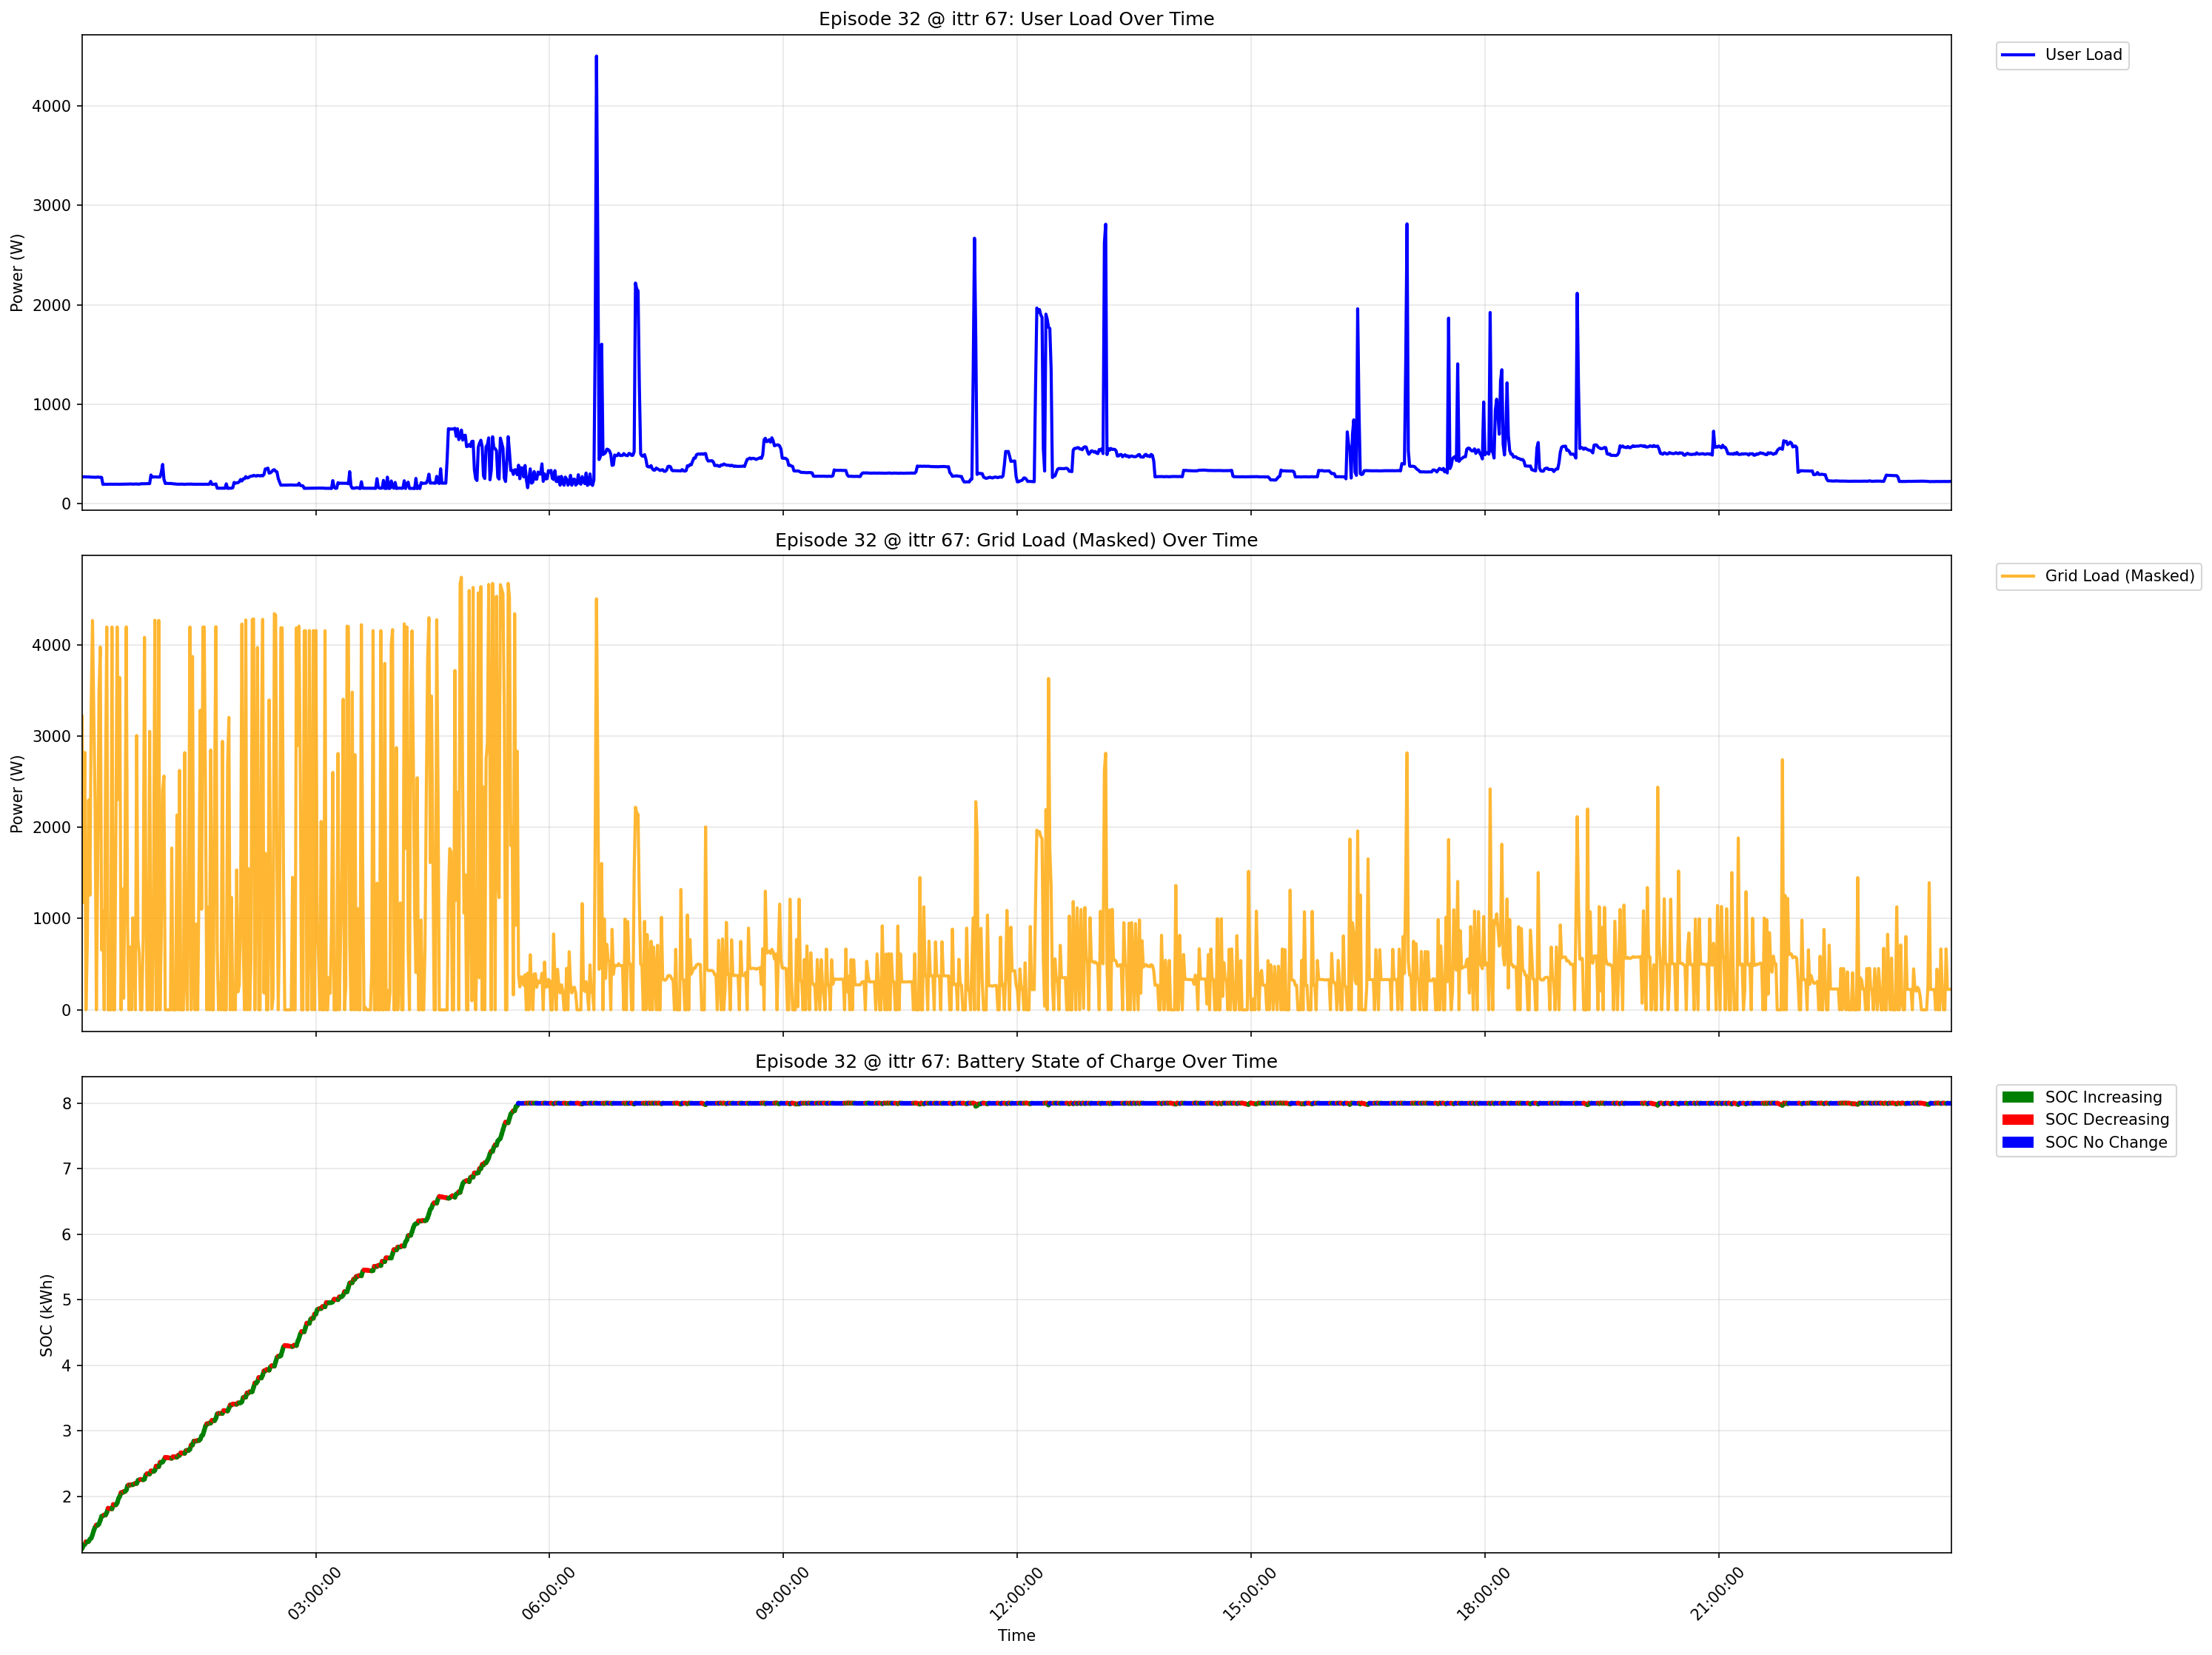

In [31]:
# Example 2: Three subplots with datetime
print_log("Creating three-subplot version with datetime...")
save_path_3sub_datetime = expt_folder / "graphs" / "per_episode" / f"episode_{episode_idx}_three_subplots_datetime.png"
fig2 = plot_episode_details_three_subplots(episode_df, episode_idx, save_path=None, use_datetime=True)
plt.close(fig2)

In [19]:
# for each episode, plot the details with three subplots with datetime enabled
# then save the figure in the per_episode folder
for i in range(0, len(episode_info_dfs)):
    episode_df = episode_info_dfs[i]
    episode_idx = episode_df['episode_index'].iloc[0]  # Get the actual episode index
    
    # Create save path for individual episode plots
    save_path = expt_folder / "graphs" / "per_episode" / f"episode_{i+1:0>4d}_three_subplots.png"

    if not save_path.parent.exists():
        save_path.parent.mkdir(parents=True)

    fig = plot_episode_details_three_subplots(episode_df, episode_idx, save_path=save_path, use_datetime=True, show=False)

    print_log(f"Saved episode {episode_idx} details to {save_path}")

    # Close the figure to free memory
    plt.close('all')

[2025-07-27 14:37:31:135] Saved episode 96 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0001_three_subplots.png
[2025-07-27 14:37:32:004] Saved episode 8 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0002_three_subplots.png
[2025-07-27 14:37:32:871] Saved episode 147 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0003_three_subplots.png
[2025-07-27 14:37:33:749] Saved episode 35 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0004_three_subplots.png
[2025-07-27 14:37:34:600] Saved episode 41 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0005_three_subplots.png
[2025-07-27 14:37:35:470] Saved episode 29 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0006_three_subplots.png
[2025-07-27 14:37:36:321] Saved episode 54 details to experiments/20250727_010853/logs_train/graphs/per_episode/episode_0007_three_subpl

Another way to perform that is we create a dictionary with key = episode_index

Then we put the episode_idx to each value of the dictionary

In [20]:
# Create multiple grouping strategies for comprehensive analysis

# 1. Original grouping by episode index (for backward compatibility)
grouped_episode_idx = {}
for i, episode_df in enumerate(episode_info_dfs):
    episode_idx = episode_df['episode_index'].iloc[0]  # Get the actual episode index
    if episode_idx not in grouped_episode_idx:
        grouped_episode_idx[episode_idx] = []
    grouped_episode_idx[episode_idx].append(i)  # Store the index of the episode_df w.r.t. episode_info_dfs

# 2. Enhanced grouping by content ID (for curriculum learning analysis)
grouped_by_content_id = {}
grouped_by_episode_length = {}
grouped_by_curriculum_phase = {}

if 'episode_metadata_df' in locals():
    for i, episode_df in enumerate(episode_info_dfs):
        episode_iteration = int(episode_df['episode'].iloc[0])  # Episode iteration number
        
        # Find corresponding metadata
        metadata = episode_metadata_df[episode_metadata_df['episode_idx'] == episode_iteration]
        
        if len(metadata) > 0:
            metadata_row = metadata.iloc[0]
            
            # Group by content ID
            content_id = metadata_row.get('episode_content_id', f'unknown_{episode_iteration}')
            if content_id not in grouped_by_content_id:
                grouped_by_content_id[content_id] = []
            grouped_by_content_id[content_id].append(i)
            
            # Group by episode length
            episode_length = metadata_row.get('episode_length_days', 1)
            if episode_length not in grouped_by_episode_length:
                grouped_by_episode_length[episode_length] = []
            grouped_by_episode_length[episode_length].append(i)
            
            # Group by curriculum phase (if available)
            curriculum_phase = metadata_row.get('curriculum_phase')
            if curriculum_phase is not None:
                if curriculum_phase not in grouped_by_curriculum_phase:
                    grouped_by_curriculum_phase[curriculum_phase] = []
                grouped_by_curriculum_phase[curriculum_phase].append(i)

print_log(f"Episode grouping summary:")
print_log(f"- By episode index: {len(grouped_episode_idx)} unique episodes")
print_log(f"- By content ID: {len(grouped_by_content_id)} unique episode contents")
print_log(f"- By episode length: {len(grouped_by_episode_length)} different lengths: {list(grouped_by_episode_length.keys())}")
print_log(f"- By curriculum phase: {len(grouped_by_curriculum_phase)} phases: {list(grouped_by_curriculum_phase.keys())}")

# Display some examples
print_log("\nExamples of repeated episode contents:")
repeated_contents = {k: v for k, v in grouped_by_content_id.items() if len(v) > 1}
for content_id, episode_indices in list(repeated_contents.items())[:3]:  # Show first 3 examples
    if content_id != 'unknown_0':  # Skip unknown entries
        print_log(f"Content {content_id[:8]}... appears in episodes: {episode_indices}")

grouped_episode_idx

[2025-07-27 14:46:51:466] Episode grouping summary:
[2025-07-27 14:46:51:466] - By episode index: 159 unique episodes
[2025-07-27 14:46:51:466] - By content ID: 159 unique episode contents
[2025-07-27 14:46:51:466] - By episode length: 1 different lengths: [1]
[2025-07-27 14:46:51:466] - By curriculum phase: 0 phases: []
[2025-07-27 14:46:51:466] 
Examples of repeated episode contents:
[2025-07-27 14:46:51:466] Content 43ad0a67... appears in episodes: [0, 348]
[2025-07-27 14:46:51:466] Content ca0ec226... appears in episodes: [1, 272]
[2025-07-27 14:46:51:466] Content a5a8920f... appears in episodes: [2, 148, 464]


{96: [0, 348],
 8: [1, 272],
 147: [2, 148, 464],
 35: [3, 63, 265, 361, 390, 466, 488],
 41: [4, 54, 101, 258],
 29: [5, 47, 195, 257, 284, 287, 569],
 54: [6, 118, 177, 268, 421, 494],
 28: [7, 87, 164, 234, 344, 409],
 56: [8, 301],
 131: [9, 117, 138, 179, 336],
 73: [10, 72, 232, 398, 525],
 149: [11, 86, 315, 381],
 72: [12, 244, 256, 388, 424],
 44: [13, 255, 520, 551, 599],
 127: [14, 289, 383, 536],
 132: [15, 182, 218, 404],
 139: [16, 203, 288, 385, 469],
 144: [17, 280, 515, 535, 542],
 4: [18, 197, 202, 328, 441, 483],
 83: [19, 37, 58, 310, 420],
 43: [20, 115, 397, 406, 411, 522, 571],
 39: [21, 22, 40, 223, 365],
 133: [23, 176, 380, 438, 505, 546],
 128: [24, 38, 366],
 34: [25, 36, 389, 453, 514],
 66: [26, 70, 143, 264, 342, 439, 442],
 120: [27, 153, 184, 444, 474],
 24: [28, 191, 217, 247, 487, 527],
 102: [29, 454],
 71: [30, 90, 116, 379, 435, 538, 579, 589],
 150: [31, 211, 309, 500],
 119: [32, 219, 427],
 37: [33, 39, 185, 225, 263, 401, 523, 537],
 135: [34, 

---

In [ ]:
# Curriculum Learning Analysis Functions

def analyze_performance_by_episode_length():
    """Analyze agent performance based on episode length"""
    if 'episode_metadata_df' not in locals() or len(grouped_by_episode_length) == 0:
        print_log("No episode length information available for analysis")
        return None
    
    performance_by_length = {}
    
    for length, episode_indices in grouped_by_episode_length.items():
        episode_rewards = []
        for i in episode_indices:
            episode_df = episode_info_dfs[i]
            total_reward = episode_df['reward'].sum()
            mean_reward = episode_df['reward'].mean()
            episode_rewards.append({'total': total_reward, 'mean': mean_reward})
        
        if episode_rewards:
            performance_by_length[length] = {
                'count': len(episode_rewards),
                'total_reward_mean': np.mean([r['total'] for r in episode_rewards]),
                'total_reward_std': np.std([r['total'] for r in episode_rewards]),
                'mean_reward_mean': np.mean([r['mean'] for r in episode_rewards]),
                'mean_reward_std': np.std([r['mean'] for r in episode_rewards])
            }
    
    performance_df = pd.DataFrame(performance_by_length).T
    performance_df.index.name = 'episode_length_days'
    return performance_df.reset_index()

def analyze_curriculum_progression():
    """Analyze how performance changes across curriculum phases"""
    if 'episode_metadata_df' not in locals() or len(grouped_by_curriculum_phase) == 0:
        print_log("No curriculum phase information available for analysis")
        return None
    
    progression_data = {}
    
    for phase, episode_indices in grouped_by_curriculum_phase.items():
        episode_rewards = []
        episode_lengths = []
        
        for i in episode_indices:
            episode_df = episode_info_dfs[i]
            episode_iteration = int(episode_df['episode'].iloc[0])
            metadata = episode_metadata_df[episode_metadata_df['episode_idx'] == episode_iteration]
            
            if len(metadata) > 0:
                total_reward = episode_df['reward'].sum()
                episode_length = metadata.iloc[0].get('episode_length_days', 1)
                episode_rewards.append(total_reward)
                episode_lengths.append(episode_length)
        
        if episode_rewards:
            progression_data[phase] = {
                'episode_count': len(episode_rewards),
                'mean_reward': np.mean(episode_rewards),
                'std_reward': np.std(episode_rewards),
                'mean_episode_length': np.mean(episode_lengths),
                'episode_lengths': list(set(episode_lengths))
            }
    
    return progression_data

# Run the analysis
print_log("=== Curriculum Learning Performance Analysis ===")

performance_by_length = analyze_performance_by_episode_length()
if performance_by_length is not None:
    print_log("\nPerformance by Episode Length:")
    display(performance_by_length)

curriculum_progression = analyze_curriculum_progression()
if curriculum_progression is not None:
    print_log("\nCurriculum Progression Analysis:")
    for phase, data in curriculum_progression.items():
        print_log(f"Phase {phase}: {data['episode_count']} episodes, "
                 f"mean reward: {data['mean_reward']:.2f}±{data['std_reward']:.2f}, "
                 f"lengths: {data['episode_lengths']}")

In [21]:
# Create a summary grid plot showing multiple episodes with curriculum info
def plot_episodes_grid(episode_dfs_list, episode_indices=None, save_path=None, show=True, include_curriculum_info=True):
    """
    Create a grid plot showing multiple episodes in subplots with curriculum learning information
    
    Args:
        episode_dfs_list: List of episode DataFrames
        episode_indices: List of episode indices to plot (e.g., [0, 5, 10, 15]). 
                        If None, plots first 9 episodes.
        save_path: Optional path to save the figure
        show: Whether to display the plot
        include_curriculum_info: Whether to include curriculum information in titles
    """
    # Determine which episodes to plot
    if episode_indices is None:
        n_episodes = min(len(episode_dfs_list), 9)
        episodes_to_plot = list(range(n_episodes))
    else:
        episodes_to_plot = [idx for idx in episode_indices if idx < len(episode_dfs_list)]
        n_episodes = len(episodes_to_plot)
    
    if n_episodes == 0:
        print("No valid episodes to plot.")
        return None
    
    # Compute optimal grid layout
    def compute_optimal_layout(n):
        """Compute optimal number of rows and columns for n subplots"""
        if n <= 0:
            return 1, 1
        elif n == 1:
            return 1, 1
        elif n == 2:
            return 1, 2
        elif n == 3:
            return 1, 3
        elif n == 4:
            return 2, 2
        elif n <= 6:
            return 2, 3
        elif n <= 8:
            return 2, 4
        elif n <= 10:
            return 2, 5
        else:
            # For larger numbers, try to keep aspect ratio reasonable
            cols = int(np.ceil(np.sqrt(n)))
            rows = int(np.ceil(n / cols))
            return rows, cols
    
    n_rows, n_cols = compute_optimal_layout(n_episodes)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6*n_rows), dpi=150)
    
    # Handle single subplot case
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i in range(n_episodes):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 or n_cols > 1 else axes[0, 0]
        
        # Get the episode index and corresponding dataframe
        episode_idx_in_list = episodes_to_plot[i]
        episode_df = episode_dfs_list[episode_idx_in_list]
        episode_idx = episode_df['episode_index'].iloc[0]
        episode_ittr = episode_df['episode'].iloc[0]
        time_steps = range(len(episode_df))
        
        # Get curriculum information if available
        episode_length_days = 1
        curriculum_phase = None
        content_id = None
        
        if include_curriculum_info and 'episode_metadata_df' in locals():
            metadata = episode_metadata_df[episode_metadata_df['episode_idx'] == episode_ittr]
            if len(metadata) > 0:
                metadata_row = metadata.iloc[0]
                episode_length_days = metadata_row.get('episode_length_days', 1)
                curriculum_phase = metadata_row.get('curriculum_phase')
                content_id = metadata_row.get('episode_content_id', '')
        
        # Plot user load and grid load
        ax.plot(time_steps, episode_df['user_load (W)'], label='User Load', color='blue', alpha=0.7)
        ax.plot(time_steps, episode_df['grid_load (W)'], label='Grid Load', color='pink', alpha=0.7)
        
        # Plot SOC on secondary y-axis with LineCollection
        ax2 = ax.twinx()
        soc_values = episode_df['battery_soc (kWh)'].values
        soc_changes = np.diff(soc_values)
        
        # Create numerical color array based on SOC changes
        color_values = []
        for change in soc_changes:
            if change > 1e-6:
                color_values.append(1)    # SOC increases (green)
            elif change < -1e-6:
                color_values.append(-1)   # SOC decreases (red)  
            else:
                color_values.append(0)    # No change (blue)
        
        # Create line segments for LineCollection
        from matplotlib.collections import LineCollection
        points = np.array([time_steps, soc_values]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create LineCollection with custom colormap
        lc = LineCollection(segments, linewidth=2, capstyle='round')
        lc.set_array(np.array(color_values))
        
        # Create custom colormap: red (-1) -> blue (0) -> green (1)
        from matplotlib.colors import ListedColormap
        colors_map = ['red', 'blue', 'green']
        cmap = ListedColormap(colors_map, name='soc_change', N=3)
        
        lc.set_cmap(cmap)
        lc.set_clim(-1, 1)
        
        # Add the line collection to the plot
        line = ax2.add_collection(lc)

        # Enhanced title with curriculum information
        if include_curriculum_info and curriculum_phase is not None:
            title = f'Ep {episode_idx} @ ittr {episode_ittr}\n{episode_length_days}d, Phase {curriculum_phase}'
        elif include_curriculum_info and episode_length_days != 1:
            title = f'Ep {episode_idx} @ ittr {episode_ittr}\n{episode_length_days} day(s)'
        else:
            title = f'Episode {episode_idx} @ ittr {episode_ittr}'
            
        ax.set_title(title, fontsize=10)
        ax.set_xlabel('Time Steps', fontsize=8)
        ax.set_ylabel('Power (W)', fontsize=8)
        ax2.set_ylabel('SOC (%)', fontsize=8)
        
        # Set axis limits for better visualization
        ax2.set_xlim(0, len(time_steps)-1)
        ax2.set_ylim(soc_values.min() * 0.95, soc_values.max() * 1.05)
        
        if i == 0:  # Add legend only to first subplot
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
            # Add SOC legend
            legend_elements = [Patch(facecolor='green', label='SOC ↑'),
                             Patch(facecolor='red', label='SOC ↓'),
                             Patch(facecolor='blue', label='SOC →')]
            ax2.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.8), loc='upper left', fontsize=8)
        
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(n_episodes, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        if n_rows > 1 or n_cols > 1:
            ax = axes[row, col]
        else:
            continue  # No empty plots for single subplot
        ax.set_visible(False)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
    return fig

In [ ]:
# Curriculum Learning Specific Plotting Functions

def plot_performance_by_episode_length(performance_df=None, save_path=None, show=True):
    """Plot agent performance comparison across different episode lengths"""
    if performance_df is None:
        performance_df = analyze_performance_by_episode_length()
    
    if performance_df is None:
        print_log("No performance data available for plotting")
        return None
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10), dpi=150)
    
    # Plot 1: Episode count by length
    ax1.bar(performance_df['episode_length_days'], performance_df['count'], color='skyblue', alpha=0.7)
    ax1.set_title('Number of Episodes by Length')
    ax1.set_xlabel('Episode Length (days)')
    ax1.set_ylabel('Episode Count')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Total reward mean by length
    ax2.errorbar(performance_df['episode_length_days'], performance_df['total_reward_mean'], 
                 yerr=performance_df['total_reward_std'], marker='o', capsize=5, color='green')
    ax2.set_title('Total Episode Reward by Length')
    ax2.set_xlabel('Episode Length (days)')
    ax2.set_ylabel('Total Reward')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Mean reward per step by length
    ax3.errorbar(performance_df['episode_length_days'], performance_df['mean_reward_mean'], 
                 yerr=performance_df['mean_reward_std'], marker='s', capsize=5, color='orange')
    ax3.set_title('Mean Reward per Step by Length')
    ax3.set_xlabel('Episode Length (days)')
    ax3.set_ylabel('Mean Reward per Step')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Reward efficiency (total reward / episode length)
    efficiency = performance_df['total_reward_mean'] / performance_df['episode_length_days']
    ax4.bar(performance_df['episode_length_days'], efficiency, color='purple', alpha=0.7)
    ax4.set_title('Reward Efficiency (Total Reward / Episode Length)')
    ax4.set_xlabel('Episode Length (days)')
    ax4.set_ylabel('Reward per Day')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
    return fig

def plot_curriculum_progression_timeline(save_path=None, show=True):
    """Plot how performance changes over training time with curriculum progression"""
    if 'episode_metadata_df' not in locals():
        print_log("No metadata available for curriculum progression plot")
        return None
    
    # Create timeline data
    timeline_data = []
    for i, episode_df in enumerate(episode_info_dfs):
        episode_iteration = int(episode_df['episode'].iloc[0])
        metadata = episode_metadata_df[episode_metadata_df['episode_idx'] == episode_iteration]
        
        if len(metadata) > 0:
            metadata_row = metadata.iloc[0]
            total_reward = episode_df['reward'].sum()
            
            timeline_data.append({
                'episode_iteration': episode_iteration,
                'total_reward': total_reward,
                'episode_length_days': metadata_row.get('episode_length_days', 1),
                'curriculum_phase': metadata_row.get('curriculum_phase'),
                'episode_idx': episode_df['episode_index'].iloc[0]
            })
    
    timeline_df = pd.DataFrame(timeline_data)
    
    if len(timeline_df) == 0:
        print_log("No valid timeline data found")
        return None
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), sharex=True, dpi=150)
    
    # Plot 1: Total reward over time with episode length color coding
    scatter = ax1.scatter(timeline_df['episode_iteration'], timeline_df['total_reward'], 
                         c=timeline_df['episode_length_days'], cmap='viridis', alpha=0.7, s=50)
    ax1.set_title('Episode Reward Over Training Time (Color = Episode Length)')
    ax1.set_ylabel('Total Episode Reward')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Episode Length (days)')
    
    # Plot 2: Episode length over time
    ax2.scatter(timeline_df['episode_iteration'], timeline_df['episode_length_days'], 
               alpha=0.7, color='orange', s=30)
    ax2.set_title('Episode Length Over Training Time')
    ax2.set_ylabel('Episode Length (days)')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Curriculum phase over time (if available)
    if timeline_df['curriculum_phase'].notna().any():
        phase_colors = {'phase1': 'red', 'phase2': 'orange', 'phase3': 'yellow', 
                       'phase4': 'green', 'phase5': 'blue'}
        for phase in timeline_df['curriculum_phase'].dropna().unique():
            phase_data = timeline_df[timeline_df['curriculum_phase'] == phase]
            ax3.scatter(phase_data['episode_iteration'], [phase] * len(phase_data), 
                       label=f'Phase {phase}', color=phase_colors.get(f'phase{phase}', 'gray'), s=30)
        ax3.set_title('Curriculum Phase Over Training Time')
        ax3.set_ylabel('Curriculum Phase')
        ax3.legend()
    else:
        ax3.text(0.5, 0.5, 'No curriculum phase information available', 
                transform=ax3.transAxes, ha='center', va='center')
        ax3.set_title('Curriculum Phase Over Training Time')
    
    ax3.set_xlabel('Episode Iteration')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
    return fig

def plot_episodes_by_content_groups(max_groups=5, save_path=None, show=True):
    """Plot episodes grouped by content ID to show performance on same episode content"""
    if len(grouped_by_content_id) == 0:
        print_log("No content-based grouping available")
        return None
    
    # Find groups with multiple episodes (repeated content)
    repeated_groups = {k: v for k, v in grouped_by_content_id.items() 
                      if len(v) > 1 and k.startswith('md5_')}  # Only real content IDs
    
    if len(repeated_groups) == 0:
        print_log("No repeated episode content found")
        return None
    
    # Take first max_groups for plotting
    groups_to_plot = dict(list(repeated_groups.items())[:max_groups])
    
    fig, axes = plt.subplots(len(groups_to_plot), 1, figsize=(15, 4 * len(groups_to_plot)), dpi=150)
    
    if len(groups_to_plot) == 1:
        axes = [axes]
    
    for idx, (content_id, episode_indices) in enumerate(groups_to_plot.items()):
        ax = axes[idx]
        
        # Plot performance for each episode with this content
        rewards = []
        iterations = []
        lengths = []
        
        for ep_idx in episode_indices:
            episode_df = episode_info_dfs[ep_idx]
            episode_iteration = int(episode_df['episode'].iloc[0])
            total_reward = episode_df['reward'].sum()
            
            # Get episode length
            metadata = episode_metadata_df[episode_metadata_df['episode_idx'] == episode_iteration]
            episode_length = metadata.iloc[0].get('episode_length_days', 1) if len(metadata) > 0 else 1
            
            rewards.append(total_reward)
            iterations.append(episode_iteration)
            lengths.append(episode_length)
        
        # Plot rewards over training iterations
        ax.plot(iterations, rewards, 'o-', markersize=8, linewidth=2, alpha=0.8)
        ax.set_title(f'Performance on Same Episode Content (ID: {content_id[:8]}...)\n'
                    f'Episode Length: {lengths[0]} day(s), Repeated {len(episode_indices)} times')
        ax.set_xlabel('Training Iteration')
        ax.set_ylabel('Total Episode Reward')
        ax.grid(True, alpha=0.3)
        
        # Add value labels on points
        for i, (x, y) in enumerate(zip(iterations, rewards)):
            ax.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
    return fig

In [25]:
# Create multiple enhanced grid summary plots with curriculum information
# Each plot will show 10 episodes with step=5

total_episodes = len(episode_info_dfs)
episodes_per_plot = 10  # Number of episodes per grid plot
step_size = 5           # Step between episodes

# Calculate how many plots we need based on episodes_per_plot * step_size chunks
chunk_size = episodes_per_plot * step_size  # 50 episodes per chunk

print_log(f"Total episodes available: {total_episodes}")
print_log(f"Creating enhanced grid plots for every {episodes_per_plot} episodes (step={step_size})")

for start_idx in range(0, total_episodes, chunk_size):
    # Create episode indices for this chunk: [start_idx, start_idx+5, start_idx+10, ..., start_idx+45]
    episode_indices = [i for i in range(start_idx, min(start_idx + chunk_size, total_episodes), step_size)]
    
    # Only create plot if we have at least a few episodes
    if len(episode_indices) >= 2:
        print_log(f"Creating enhanced grid plot for episodes: {episode_indices}")
        
        # Create filename with episode range
        grid_save_path = expt_folder / "graphs" / "enhanced_grid_plots" / f"episodes_enhanced_grid_[{episode_indices[0]+1:04d}_{episode_indices[-1]+1:04d}].png"

        if not grid_save_path.parent.exists():
            grid_save_path.parent.mkdir(parents=True)

        # Create and save the enhanced plot with curriculum information
        fig_grid = plot_episodes_grid(
            episode_info_dfs, 
            episode_indices=episode_indices, 
            save_path=grid_save_path, 
            show=False,
            include_curriculum_info=True  # Enhanced with curriculum info
        )

        # Close figure to free memory
        if fig_grid:
            plt.close('all')
    else:
        print_log(f"Skipping range starting at {start_idx} - not enough episodes remaining")

print_log("Completed creating all enhanced grid summary plots with curriculum information.")

[2025-07-27 14:52:51:990] Total episodes available: 605
[2025-07-27 14:52:51:991] Creating enhanced grid plots for every 10 episodes (step=5)
[2025-07-27 14:52:51:991] Creating enhanced grid plot for episodes: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
[2025-07-27 14:52:53:943] Creating enhanced grid plot for episodes: [50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
[2025-07-27 14:52:55:910] Creating enhanced grid plot for episodes: [100, 105, 110, 115, 120, 125, 130, 135, 140, 145]
[2025-07-27 14:52:58:187] Creating enhanced grid plot for episodes: [150, 155, 160, 165, 170, 175, 180, 185, 190, 195]
[2025-07-27 14:53:00:174] Creating enhanced grid plot for episodes: [200, 205, 210, 215, 220, 225, 230, 235, 240, 245]
[2025-07-27 14:53:02:414] Creating enhanced grid plot for episodes: [250, 255, 260, 265, 270, 275, 280, 285, 290, 295]
[2025-07-27 14:53:04:381] Creating enhanced grid plot for episodes: [300, 305, 310, 315, 320, 325, 330, 335, 340, 345]
[2025-07-27 14:53:06:327] Creating enhanced gri

In [24]:
# Enhanced episode plotting with curriculum information
# This is useful to compare the same episode with different indices

for k in grouped_episode_idx.keys():
    if len(grouped_episode_idx[k]) >= 1:
        print_log(f"Plotting episode {k:04d} with indices: {grouped_episode_idx[k]}")

        # Create a save path for the grid plot
        grid_save_path = expt_folder / "graphs" / "grouped_by_episode_idx" / f"episode_idx_{k:04d}_grid_summary.png"

        if not grid_save_path.parent.exists():
            grid_save_path.parent.mkdir(parents=True)

        # Use enhanced grid plot with curriculum information
        fig_grid = plot_episodes_grid(
            episode_info_dfs, 
            episode_indices=grouped_episode_idx[k], 
            save_path=grid_save_path, 
            show=False,
            include_curriculum_info=True  # Enable curriculum info display
        )
        plt.close('all')

[2025-07-27 14:50:25:658] Plotting episode 0096 with indices: [0, 348]
[2025-07-27 14:50:26:137] Plotting episode 0008 with indices: [1, 272]
[2025-07-27 14:50:26:567] Plotting episode 0147 with indices: [2, 148, 464]
[2025-07-27 14:50:27:205] Plotting episode 0035 with indices: [3, 63, 265, 361, 390, 466, 488]
[2025-07-27 14:50:28:705] Plotting episode 0041 with indices: [4, 54, 101, 258]
[2025-07-27 14:50:29:495] Plotting episode 0029 with indices: [5, 47, 195, 257, 284, 287, 569]
[2025-07-27 14:50:31:034] Plotting episode 0054 with indices: [6, 118, 177, 268, 421, 494]
[2025-07-27 14:50:32:249] Plotting episode 0028 with indices: [7, 87, 164, 234, 344, 409]
[2025-07-27 14:50:33:480] Plotting episode 0056 with indices: [8, 301]
[2025-07-27 14:50:33:896] Plotting episode 0131 with indices: [9, 117, 138, 179, 336]
[2025-07-27 14:50:35:016] Plotting episode 0073 with indices: [10, 72, 232, 398, 525]
[2025-07-27 14:50:36:164] Plotting episode 0149 with indices: [11, 86, 315, 381]
[2025-0

In [ ]:
# ===== CURRICULUM LEARNING ANALYSIS PLOTS =====

print_log("=== Creating Curriculum Learning Analysis Plots ===")

# 1. Performance comparison by episode length
if 'performance_by_length' in locals() and performance_by_length is not None:
    print_log("Creating performance by episode length plot...")
    length_perf_save_path = expt_folder / "graphs" / "curriculum_performance_by_length.png"
    if not length_perf_save_path.parent.exists():
        length_perf_save_path.parent.mkdir(parents=True)
    
    fig_length_perf = plot_performance_by_episode_length(
        performance_by_length, 
        save_path=length_perf_save_path, 
        show=False
    )
    plt.close('all')
    print_log(f"Saved performance by length plot to {length_perf_save_path}")

# 2. Curriculum progression timeline
print_log("Creating curriculum progression timeline...")
timeline_save_path = expt_folder / "graphs" / "curriculum_progression_timeline.png"
fig_timeline = plot_curriculum_progression_timeline(
    save_path=timeline_save_path, 
    show=False
)
if fig_timeline:
    plt.close('all')
    print_log(f"Saved curriculum timeline plot to {timeline_save_path}")

# 3. Performance on repeated episode content
print_log("Creating content-based performance comparison...")
content_perf_save_path = expt_folder / "graphs" / "performance_by_content_groups.png"
fig_content_perf = plot_episodes_by_content_groups(
    max_groups=3, 
    save_path=content_perf_save_path, 
    show=False
)
if fig_content_perf:
    plt.close('all')
    print_log(f"Saved content-based performance plot to {content_perf_save_path}")

# 4. Enhanced grid plots by episode length
print_log("Creating episode length specific grid plots...")
for length, episode_indices in grouped_by_episode_length.items():
    if len(episode_indices) >= 1:
        # Take first 9 episodes of this length for visualization
        selected_indices = episode_indices[:9]
        
        grid_save_path = expt_folder / "graphs" / "by_episode_length" / f"episodes_{length}day_grid_summary.png"
        if not grid_save_path.parent.exists():
            grid_save_path.parent.mkdir(parents=True)
        
        print_log(f"Creating grid plot for {length}-day episodes: {len(selected_indices)} episodes")
        fig_grid = plot_episodes_grid(
            episode_info_dfs, 
            episode_indices=selected_indices, 
            save_path=grid_save_path, 
            show=False,
            include_curriculum_info=True
        )
        plt.close('all')

# 5. Enhanced grid plots by curriculum phase
if len(grouped_by_curriculum_phase) > 0:
    print_log("Creating curriculum phase specific grid plots...")
    for phase, episode_indices in grouped_by_curriculum_phase.items():
        if len(episode_indices) >= 1:
            # Take first 9 episodes of this phase for visualization
            selected_indices = episode_indices[:9]
            
            grid_save_path = expt_folder / "graphs" / "by_curriculum_phase" / f"phase_{phase}_grid_summary.png"
            if not grid_save_path.parent.exists():
                grid_save_path.parent.mkdir(parents=True)
            
            print_log(f"Creating grid plot for curriculum phase {phase}: {len(selected_indices)} episodes")
            fig_grid = plot_episodes_grid(
                episode_info_dfs, 
                episode_indices=selected_indices, 
                save_path=grid_save_path, 
                show=False,
                include_curriculum_info=True
            )
            plt.close('all')

print_log("Completed all curriculum learning analysis plots!")

In [ ]:
# ===== CURRICULUM LEARNING INTEGRATION SUMMARY =====

print_log("=" * 80)
print_log("CURRICULUM LEARNING ANALYSIS COMPLETE")
print_log("=" * 80)

print_log("\n📊 New Analysis Capabilities Added:")
print_log("✅ Enhanced episode metadata loading with content IDs and curriculum info")
print_log("✅ Content-based episode grouping for performance comparison")
print_log("✅ Episode length and curriculum phase analysis")
print_log("✅ Performance comparison across different episode lengths")
print_log("✅ Curriculum progression timeline visualization")
print_log("✅ Repeated episode content performance tracking")
print_log("✅ Enhanced grid plots with curriculum information display")

print_log("\n📈 Analysis Results Generated:")
if 'performance_by_length' in locals() and performance_by_length is not None:
    print_log(f"📋 Performance by episode length: {len(performance_by_length)} different lengths analyzed")
if 'curriculum_progression' in locals() and curriculum_progression is not None:
    print_log(f"📋 Curriculum progression: {len(curriculum_progression)} phases tracked")
if len(grouped_by_content_id) > 0:
    repeated_content = sum(1 for v in grouped_by_content_id.values() if len(v) > 1)
    print_log(f"📋 Content-based analysis: {len(grouped_by_content_id)} unique contents, {repeated_content} repeated")

print_log("\n📁 Enhanced Plots Saved in:")
print_log("📂 graphs/curriculum_performance_by_length.png - Performance comparison by episode length")
print_log("📂 graphs/curriculum_progression_timeline.png - Training progression over time")
print_log("📂 graphs/performance_by_content_groups.png - Same content, different iterations")
print_log("📂 graphs/by_episode_length/ - Episodes grouped by length")
print_log("📂 graphs/by_curriculum_phase/ - Episodes grouped by curriculum phase")
print_log("📂 graphs/enhanced_grid_plots/ - Enhanced grid plots with curriculum info")
print_log("📂 graphs/grouped_by_episode_idx/ - Traditional episode groupings (enhanced)")

print_log("\n🔧 Integration Benefits:")
print_log("• Episode content identification enables cross-run comparisons")
print_log("• Curriculum phase tracking shows learning progression")
print_log("• Episode length analysis validates curriculum effectiveness")
print_log("• Enhanced plotting provides better insight into agent behavior")

print_log("\n🎯 Ready for curriculum learning evaluation and analysis!")
print_log("=" * 80)